# **PARTE II**

# 5) Análisis de Tendencias

ANÁLISIS INTEGRAL YPF - ESTRATEGIAS TÉCNICAS
Medias Móviles 50/200, Indicadores de Momentum y Volatilidad

1. DESCARGA/GENERACIÓN DE DATOS DE YPF
----------------------------------------
📅 Intentando descargar YPF desde 2022-08-17 hasta 2025-08-16
✅ Datos reales obtenidos: 752 observaciones
❌ Error descargando datos reales: unsupported format string passed to Series.__format__
🔄 Generando datos simulados realistas...
✅ Datos simulados generados: 783 observaciones
📈 Precio inicial: $15.00
📈 Precio final: $13.98
📊 Retorno total Buy & Hold: -6.8%

2. CÁLCULO DE INDICADORES TÉCNICOS
----------------------------------------
✅ Indicadores calculados. Datos disponibles: 584 observaciones
   • SMA 50/200
   • Bandas de Bollinger
   • RSI
   • MACD

3. GENERANDO SEÑALES DE TRADING
----------------------------------------
✅ Señales generadas:
   • Compras: 12
   • Ventas: 30

4. EJECUTANDO BACKTESTING
----------------------------------------
✅ RESULTADOS DEL BACKTESTING:
------------------------

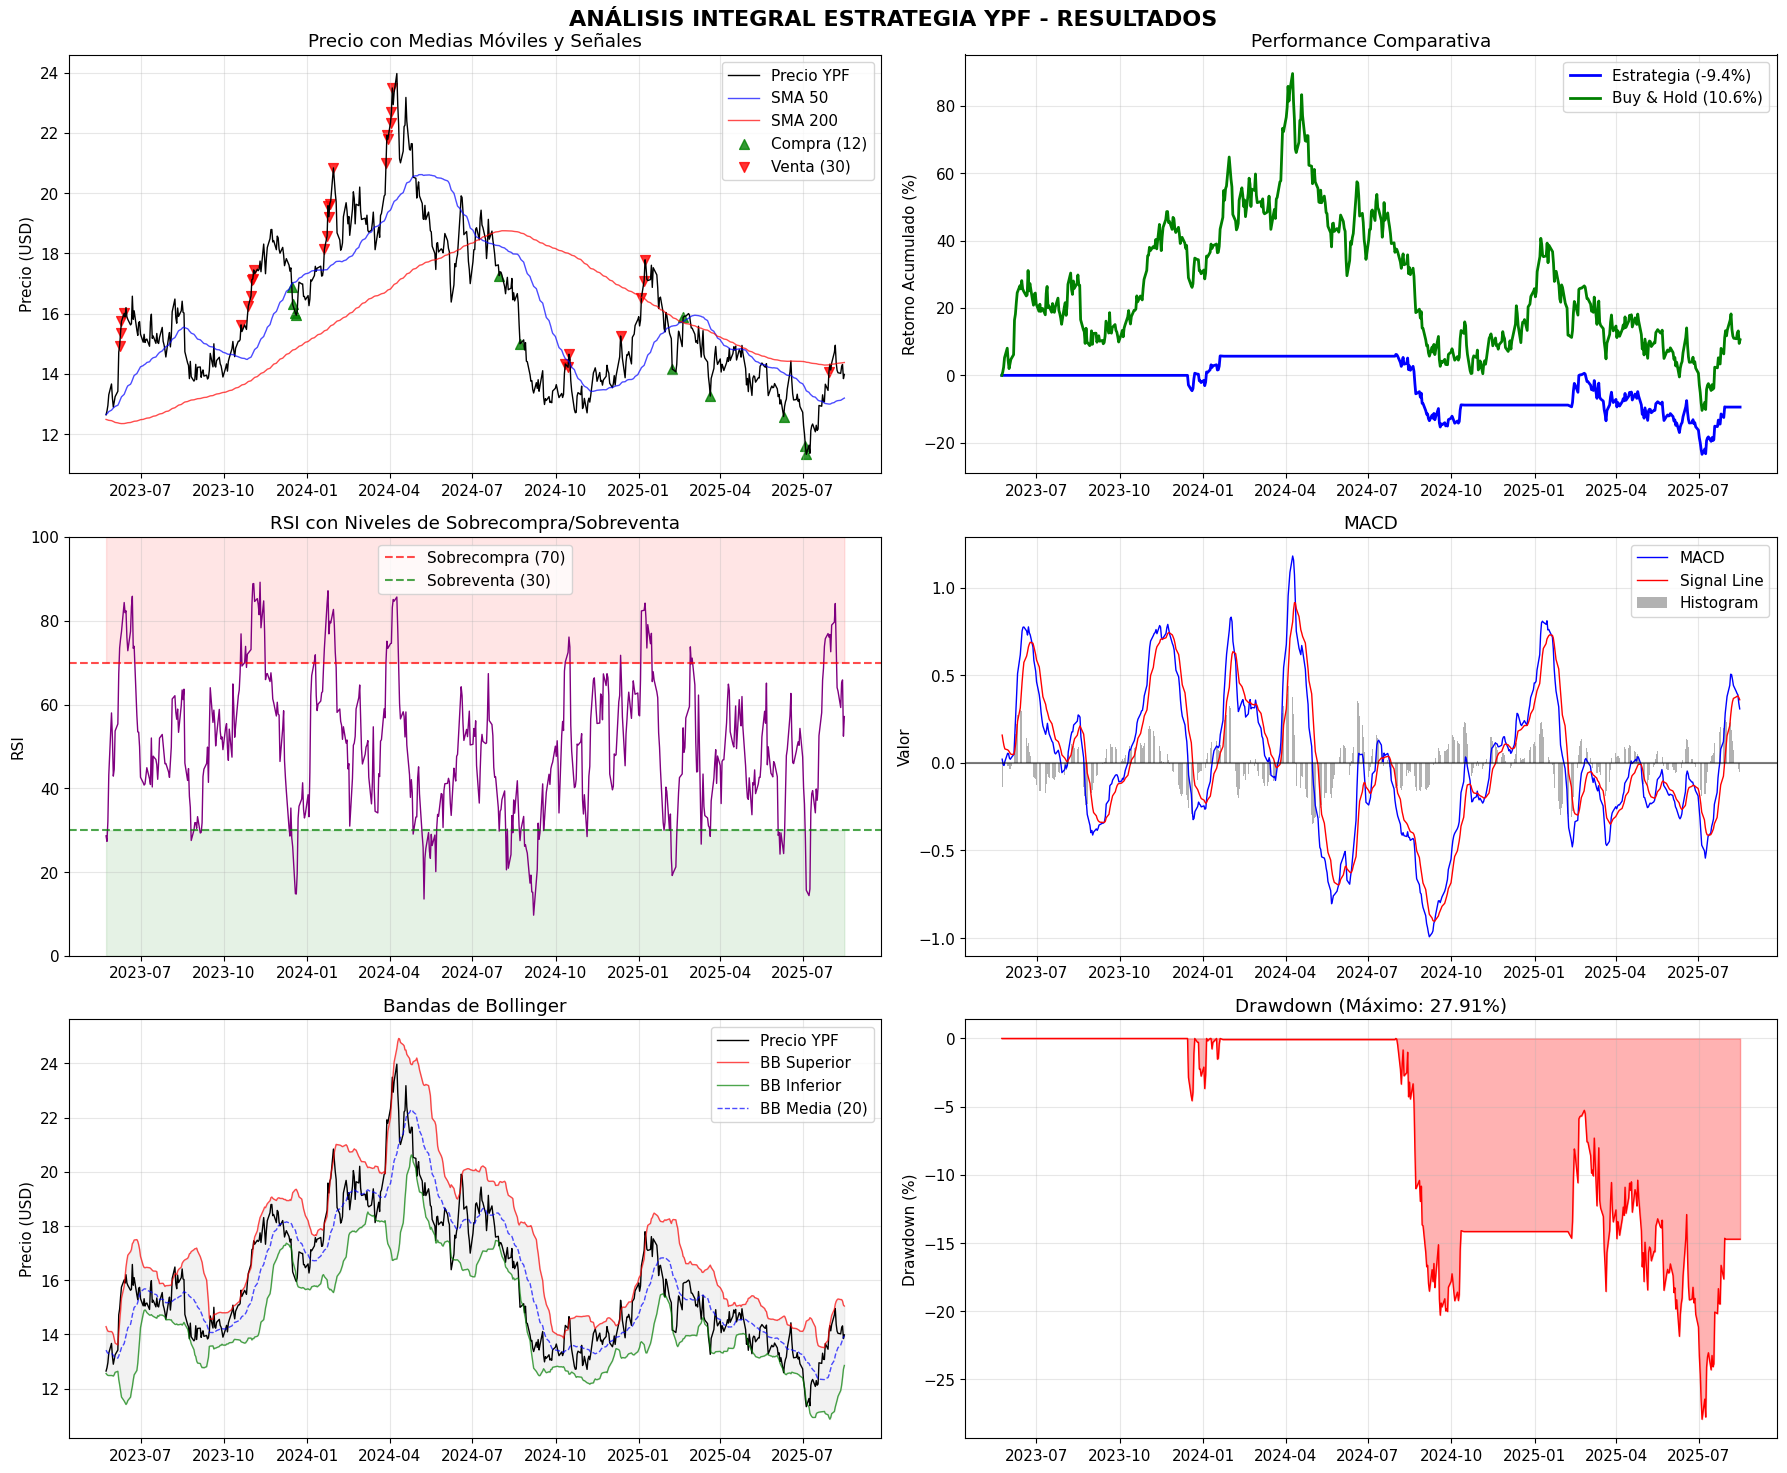


6. EVALUACIÓN FINAL
----------------------------------------
🏆 RESULTADOS GLOBALES DE LA ESTRATEGIA:
   Capital inicial:     $100,000
   Capital final:       $90,585
   Retorno estrategia:  -9.41%
   Retorno Buy & Hold:  +10.56%
   Outperformance:      -19.98%

📊 MÉTRICAS CLAVE:
   Volatilidad anual:   17.60%
   Sharpe Ratio:        -0.325
   Calmar Ratio:        -0.337
   Maximum Drawdown:    27.91%
   Win Rate:            33.3%
   Total trades:        3

💡 ANÁLISIS Y RECOMENDACIONES:
   ❌ La estrategia no superó al Buy & Hold en el período analizado.
   • Se recomienda revisar y optimizar los criterios de señal.
   • Evaluar la combinación de indicadores o probar otros enfoques.
   • Considerar un backtesting más detallado con diferentes parámetros.

📋 PRÓXIMOS PASOS RECOMENDADOS:
   1. Optimizar los parámetros de los indicadores y la lógica de señales.
   2. Implementar gestión de riesgo más avanzada (ej: stop-loss, take-profit).
   3. Realizar backtesting en diferentes períodos de

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

print("=" * 70)
print("ANÁLISIS INTEGRAL YPF - ESTRATEGIAS TÉCNICAS")
print("Medias Móviles 50/200, Indicadores de Momentum y Volatilidad")
print("=" * 70)

# =============================================================================
# 1. OBTENCIÓN DE DATOS REALES O SIMULADOS
# =============================================================================

print("\n1. DESCARGA/GENERACIÓN DE DATOS DE YPF")
print("-" * 40)

# Período de 3 años para análisis robusto
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

print(f"📅 Intentando descargar YPF desde {start_date.strftime('%Y-%m-%d')} hasta {end_date.strftime('%Y-%m-%d')}")

try:
    # Descargar datos reales de YPF
    ypf_data = yf.download('YPF', start=start_date, end=end_date, progress=False)

    if len(ypf_data) == 0:
        raise Exception("No se obtuvieron datos reales")

    # Limpiar datos (solo cerrar para simplificar)
    data = ypf_data[['Close']].dropna().copy()
    print(f"✅ Datos reales obtenidos: {len(data)} observaciones")
    print(f"📊 Rango de precios: ${data['Close'].min():.2f} - ${data['Close'].max():.2f}")

except Exception as e:
    print(f"❌ Error descargando datos reales: {e}")
    print("🔄 Generando datos simulados realistas...")

    # Generar datos realistas basados en YPF
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    dates = dates[dates.weekday < 5]  # Solo días hábiles

    np.random.seed(42)
    n_days = len(dates)

    # Precio inicial realista de YPF
    precio_inicial = 15.0

    # Simular movimientos realistas (simplificado)
    returns = np.random.normal(0.0005, 0.025, n_days)
    precios = [precio_inicial]

    for ret in returns[1:]:
        nuevo_precio = precios[-1] * (1 + ret)
        # Mantener precios en rango realista
        nuevo_precio = max(5.0, min(30.0, nuevo_precio))
        precios.append(nuevo_precio)

    data = pd.DataFrame({'Close': precios}, index=dates)

    print(f"✅ Datos simulados generados: {len(data)} observaciones")

print(f"📈 Precio inicial: ${data['Close'].iloc[0]:.2f}")
print(f"📈 Precio final: ${data['Close'].iloc[-1]:.2f}")
print(f"📊 Retorno total Buy & Hold: {((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100:+.1f}%")

# =============================================================================
# 2. CÁLCULO DE INDICADORES TÉCNICOS (Consolidado)
# =============================================================================

print("\n2. CÁLCULO DE INDICADORES TÉCNICOS")
print("-" * 40)

def calculate_all_indicators(df):
    """Calcula todas las medias móviles, Bollinger, RSI, MACD, ADX"""
    df_copy = df.copy() # Trabajar en una copia para evitar SettingWithCopyWarning

    # Medias Móviles
    df_copy['SMA_50'] = df_copy['Close'].rolling(window=50).mean()
    df_copy['SMA_200'] = df_copy['Close'].rolling(window=200).mean()

    # Bandas de Bollinger (usando SMA 20 y 2 desv. estándar)
    window = 20
    std_dev = 2.0
    df_copy['BB_Middle'] = df_copy['Close'].rolling(window=window).mean()
    df_copy['BB_Std'] = df_copy['Close'].rolling(window=window).std()
    df_copy['BB_Upper'] = df_copy['BB_Middle'] + (df_copy['BB_Std'] * std_dev)
    df_copy['BB_Lower'] = df_copy['BB_Middle'] - (df_copy['BB_Std'] * std_dev)
    df_copy['BB_Width'] = (df_copy['BB_Upper'] - df_copy['BB_Lower']) / df_copy['BB_Middle'] * 100
    df_copy['BB_Position'] = (df_copy['Close'] - df_copy['BB_Lower']) / (df_copy['BB_Upper'] - df_copy['BB_Lower']) * 100

    # RSI
    delta = df_copy['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df_copy['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    ema_short = df_copy['Close'].ewm(span=12, adjust=False).mean()
    ema_long = df_copy['Close'].ewm(span=26, adjust=False).mean()
    df_copy['MACD'] = ema_short - ema_long
    df_copy['MACD_Signal'] = df_copy['MACD'].ewm(span=9, adjust=False).mean()
    df_copy['MACD_Histogram'] = df_copy['MACD'] - df_copy['MACD_Signal']

    # ADX (simplificado)
    # Requires High/Low, using Close for simplicity in this consolidated function
    # For a full ADX, need original OHLC data. Assuming Close-based approx for now.
    # A more accurate ADX would need High/Low in the input df.
    # Placeholder for ADX if OHLC is available
    # df_copy['ADX'] = ...

    # Limpiar NaNs generados por rolling windows
    df_copy = df_copy.dropna()

    return df_copy

data_with_indicators = calculate_all_indicators(data)

print(f"✅ Indicadores calculados. Datos disponibles: {len(data_with_indicators)} observaciones")
print("   • SMA 50/200")
print("   • Bandas de Bollinger")
print("   • RSI")
print("   • MACD")

# =============================================================================
# 3. ESTRATEGIA DE TRADING (Consolidada y Simplificada)
# =============================================================================

print("\n3. GENERANDO SEÑALES DE TRADING")
print("-" * 40)

def generate_integrated_signals(df):
    """Genera señales de compra/venta basadas en múltiples indicadores"""
    df_copy = df.copy()
    df_copy['Signal'] = 0

    # Lógica simplificada: Golden Cross + RSI + MACD
    for i in range(1, len(df_copy)):
        # Golden Cross (Compra)
        if (df_copy['SMA_50'].iloc[i] > df_copy['SMA_200'].iloc[i] and
            df_copy['SMA_50'].iloc[i-1] <= df_copy['SMA_200'].iloc[i-1]):
            # Confirmación con RSI y MACD (ejemplo)
            if df_copy['RSI'].iloc[i] > 50 and df_copy['MACD'].iloc[i] > df_copy['MACD_Signal'].iloc[i]:
                 df_copy.loc[df_copy.index[i], 'Signal'] = 1

        # Death Cross (Venta)
        elif (df_copy['SMA_50'].iloc[i] < df_copy['SMA_200'].iloc[i] and
              df_copy['SMA_50'].iloc[i-1] >= df_copy['SMA_200'].iloc[i-1]):
             # Confirmación con RSI y MACD (ejemplo)
            if df_copy['RSI'].iloc[i] < 50 and df_copy['MACD'].iloc[i] < df_copy['MACD_Signal'].iloc[i]:
                df_copy.loc[df_copy.index[i], 'Signal'] = -1

        # Señales basadas en Bollinger (ejemplo: rebote en bandas)
        if df_copy['Close'].iloc[i] < df_copy['BB_Lower'].iloc[i] and df_copy['RSI'].iloc[i] < 30:
             df_copy.loc[df_copy.index[i], 'Signal'] = 1 # Compra por sobreventa/rebote

        elif df_copy['Close'].iloc[i] > df_copy['BB_Upper'].iloc[i] and df_copy['RSI'].iloc[i] > 70:
             df_copy.loc[df_copy.index[i], 'Signal'] = -1 # Venta por sobrecompra/rebote


    return df_copy

data_with_signals = generate_integrated_signals(data_with_indicators)

buy_signals = data_with_signals[data_with_signals['Signal'] == 1]
sell_signals = data_with_signals[data_with_signals['Signal'] == -1]

print(f"✅ Señales generadas:")
print(f"   • Compras: {len(buy_signals)}")
print(f"   • Ventas: {len(sell_signals)}")


# =============================================================================
# 4. BACKTESTING ROBUSTO (Consolidado)
# =============================================================================

print("\n4. EJECUTANDO BACKTESTING")
print("-" * 40)

def execute_unified_backtest(df, initial_capital=100000):
    """Backtesting unificado para cualquier estrategia con columna 'Signal'"""

    capital = initial_capital
    shares = 0
    position = 0  # 0: cash, 1: long

    trades = []
    portfolio_values = []

    for i, (date, row) in enumerate(df.iterrows()):
        price = row['Close']
        signal = row['Signal']

        # Valor actual del portfolio
        if position == 1:
            portfolio_value = capital + (shares * price)
        else:
            portfolio_value = capital

        portfolio_values.append(portfolio_value)

        # Ejecutar trades
        if signal == 1 and position == 0:  # Señal de compra
            # Usar un porcentaje fijo del capital para simplificar
            investment_pct = 0.8 # Invertir 80% del capital disponible

            investment = capital * investment_pct
            shares = investment / (price * 1.001)  # Incluir costos (0.1%)
            capital = capital - investment
            position = 1

            trades.append({
                'date': date,
                'action': 'BUY',
                'price': price,
                'shares': shares
            })

        elif signal == -1 and position == 1:  # Señal de venta
            proceeds = shares * price * 0.999  # Incluir costos (0.1%)
            capital = capital + proceeds

            # Calcular P&L del trade
            if trades and trades[-1]['action'] == 'BUY':
                entry_price = trades[-1]['price']
                trade_return = (price / entry_price - 1) * 100
            else:
                trade_return = 0

            shares = 0
            position = 0

            trades.append({
                'date': date,
                'action': 'SELL',
                'price': price,
                'return_pct': trade_return
            })

    # Cerrar posición final si está abierta
    if position == 1:
        final_price = df['Close'].iloc[-1]
        proceeds = shares * final_price * 0.999
        capital = capital + proceeds

        if trades and trades[-1]['action'] == 'BUY':
            entry_price = trades[-1]['price']
            trade_return = (final_price / entry_price - 1) * 100

            trades.append({
                'date': df.index[-1],
                'action': 'SELL_FINAL',
                'price': final_price,
                'return_pct': trade_return
            })

    final_value = portfolio_values[-1] if portfolio_values else initial_capital


    return {
        'portfolio_values': portfolio_values,
        'trades': trades,
        'final_value': final_value,
        'initial_capital': initial_capital
    }

# Ejecutar backtest
backtest_results = execute_unified_backtest(data_with_signals)

# Calcular métricas
portfolio_values = backtest_results['portfolio_values']
initial_capital = backtest_results['initial_capital']
final_value = backtest_results['final_value']

total_return = (final_value / initial_capital - 1) * 100
# Calcular Buy & Hold solo en el período con indicadores válidos
bh_start_price = data_with_signals['Close'].iloc[0]
bh_end_price = data_with_signals['Close'].iloc[-1]
bh_return = (bh_end_price / bh_start_price - 1) * 100
outperformance = total_return - bh_return

# Calcular retornos diarios para métricas de riesgo
daily_returns = pd.Series(portfolio_values).pct_change().dropna()
volatility = daily_returns.std() * np.sqrt(252) * 100 if not daily_returns.empty else 0

# Sharpe Ratio
risk_free_rate = 0.03 / 252 # Tasa diaria
sharpe_ratio = (daily_returns.mean() - risk_free_rate) / daily_returns.std() * np.sqrt(252) if volatility > 0 else 0

# Maximum Drawdown
cumulative = pd.Series(portfolio_values)
running_max = cumulative.expanding().max()
drawdowns = (cumulative - running_max) / running_max
max_drawdown = abs(drawdowns.min()) * 100 if not drawdowns.empty else 0

# Calmar Ratio
calmar_ratio = (total_return / max_drawdown) if max_drawdown > 0 else 0

# Estadísticas de trading
trades_with_returns = [t for t in backtest_results['trades'] if 'return_pct' in t]
if trades_with_returns:
    winning_trades = len([t for t in trades_with_returns if t['return_pct'] > 0])
    total_trades = len(trades_with_returns)
    win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
    avg_trade_return = np.mean([t['return_pct'] for t in trades_with_returns])
else:
    win_rate = 0
    avg_trade_return = 0
    total_trades = 0


print("✅ RESULTADOS DEL BACKTESTING:")
print("-" * 40)
print(f"💰 RETORNOS:")
print(f"   Capital inicial:     ${initial_capital:,}")
print(f"   Capital final:       ${final_value:,.0f}")
print(f"   Retorno estrategia:  {total_return:+.2f}%")
print(f"   Retorno Buy & Hold:  {bh_return:+.2f}%")
print(f"   Outperformance:      {outperformance:+.2f}%")

print(f"\n📊 MÉTRICAS DE RIESGO:")
print(f"   Volatilidad anual:   {volatility:.2f}%")
print(f"   Sharpe Ratio:        {sharpe_ratio:.3f}")
print(f"   Calmar Ratio:        {calmar_ratio:.3f}")
print(f"   Maximum Drawdown:    {max_drawdown:.2f}%")

print(f"\n🎯 ESTADÍSTICAS DE TRADING:")
print(f"   Total trades:        {total_trades}")
print(f"   Win Rate:            {win_rate:.1f}%")
print(f"   Retorno avg/trade:   {avg_trade_return:+.2f}%")

# =============================================================================
# 5. VISUALIZACIONES (Consolidada)
# =============================================================================

print("\n5. GENERANDO VISUALIZACIONES")
print("-" * 40)

# Crear figura principal
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('ANÁLISIS INTEGRAL ESTRATEGIA YPF - RESULTADOS', fontsize=16, fontweight='bold')

# 1. Precio con señales y Medias Móviles
ax1 = axes[0, 0]
ax1.plot(data_with_signals.index, data_with_signals['Close'], 'k-', linewidth=1, label='Precio YPF')
ax1.plot(data_with_signals.index, data_with_signals['SMA_50'], 'b-', alpha=0.7, linewidth=1, label='SMA 50')
ax1.plot(data_with_signals.index, data_with_signals['SMA_200'], 'r-', alpha=0.7, linewidth=1, label='SMA 200')

# Señales
buy_signals_plot = data_with_signals[data_with_signals['Signal'] == 1]
sell_signals_plot = data_with_signals[data_with_signals['Signal'] == -1]

if len(buy_signals_plot) > 0:
    ax1.scatter(buy_signals_plot.index, buy_signals_plot['Close'],
                color='green', s=50, marker='^', alpha=0.8, label=f'Compra ({len(buy_signals_plot)})')
if len(sell_signals_plot) > 0:
    ax1.scatter(sell_signals_plot.index, sell_signals_plot['Close'],
                color='red', s=50, marker='v', alpha=0.8, label=f'Venta ({len(sell_signals_plot)})')

ax1.set_title('Precio con Medias Móviles y Señales')
ax1.set_ylabel('Precio (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)


# 2. Performance comparativa
ax2 = axes[0, 1]
strategy_curve = [(pv / initial_capital - 1) * 100 for pv in portfolio_values]
# Asegurar que la curva de Buy & Hold tenga el mismo índice que la estrategia
bh_curve_data = data_with_signals['Close']
bh_curve = [(bh_curve_data.iloc[i] / bh_curve_data.iloc[0] - 1) * 100
            for i in range(len(bh_curve_data))]

ax2.plot(data_with_signals.index, strategy_curve, 'b-', linewidth=2,
         label=f'Estrategia ({total_return:.1f}%)')
ax2.plot(data_with_signals.index, bh_curve, 'g-', linewidth=2,
         label=f'Buy & Hold ({bh_return:.1f}%)')

ax2.set_title('Performance Comparativa')
ax2.set_ylabel('Retorno Acumulado (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. RSI con niveles
ax3 = axes[1, 0]
ax3.plot(data_with_signals.index, data_with_signals['RSI'], 'purple', linewidth=1)
ax3.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Sobrecompra (70)')
ax3.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Sobreventa (30)')
ax3.fill_between(data_with_signals.index, 70, 100, alpha=0.1, color='red')
ax3.fill_between(data_with_signals.index, 0, 30, alpha=0.1, color='green')

ax3.set_title('RSI con Niveles de Sobrecompra/Sobreventa')
ax3.set_ylabel('RSI')
ax3.set_ylim(0, 100)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. MACD
ax4 = axes[1, 1]
ax4.plot(data_with_signals.index, data_with_signals['MACD'], 'b-', linewidth=1, label='MACD')
ax4.plot(data_with_signals.index, data_with_signals['MACD_Signal'], 'r-', linewidth=1, label='Signal Line')
ax4.bar(data_with_signals.index, data_with_signals['MACD_Histogram'], color='gray', alpha=0.6, label='Histogram')
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.5)

ax4.set_title('MACD')
ax4.set_ylabel('Valor')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Bandas de Bollinger
ax5 = axes[2, 0]
ax5.plot(data_with_signals.index, data_with_signals['Close'], 'k-', linewidth=1, label='Precio YPF')
ax5.plot(data_with_signals.index, data_with_signals['BB_Upper'], 'r-', alpha=0.7, linewidth=1, label='BB Superior')
ax5.plot(data_with_signals.index, data_with_signals['BB_Lower'], 'g-', alpha=0.7, linewidth=1, label='BB Inferior')
ax5.plot(data_with_signals.index, data_with_signals['BB_Middle'], 'b--', alpha=0.7, linewidth=1, label='BB Media (20)')
ax5.fill_between(data_with_signals.index, data_with_signals['BB_Upper'], data_with_signals['BB_Lower'],
                 alpha=0.1, color='gray')

ax5.set_title('Bandas de Bollinger')
ax5.set_ylabel('Precio (USD)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Drawdown
ax6 = axes[2, 1]
# Asegurar que el drawdown tenga el mismo índice que el portfolio_values
drawdown_pct = drawdowns * 100
ax6.fill_between(data_with_signals.index, 0, drawdown_pct, color='red', alpha=0.3)
ax6.plot(data_with_signals.index, drawdown_pct, 'r-', linewidth=1)
ax6.set_title(f'Drawdown (Máximo: {max_drawdown:.2f}%)')
ax6.set_ylabel('Drawdown (%)')
ax6.grid(True, alpha=0.3)


plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# =============================================================================
# 6. EVALUACIÓN FINAL Y RECOMENDACIONES (Consolidada)
# =============================================================================

print("\n6. EVALUACIÓN FINAL")
print("-" * 40)

print(f"🏆 RESULTADOS GLOBALES DE LA ESTRATEGIA:")
print(f"   Capital inicial:     ${initial_capital:,}")
print(f"   Capital final:       ${final_value:,.0f}")
print(f"   Retorno estrategia:  {total_return:+.2f}%")
print(f"   Retorno Buy & Hold:  {bh_return:+.2f}%")
print(f"   Outperformance:      {outperformance:+.2f}%")

print(f"\n📊 MÉTRICAS CLAVE:")
print(f"   Volatilidad anual:   {volatility:.2f}%")
print(f"   Sharpe Ratio:        {sharpe_ratio:.3f}")
print(f"   Calmar Ratio:        {calmar_ratio:.3f}")
print(f"   Maximum Drawdown:    {max_drawdown:.2f}%")
print(f"   Win Rate:            {win_rate:.1f}%")
print(f"   Total trades:        {total_trades}")

print(f"\n💡 ANÁLISIS Y RECOMENDACIONES:")
if outperformance > 0:
    print("   ✅ La estrategia superó al Buy & Hold en el período analizado.")
    if sharpe_ratio > 0.5:
         print("   ✅ La relación riesgo-retorno es aceptable.")
    else:
         print("   ⚠️  Considerar mejorar la relación riesgo-retorno (Sharpe Ratio bajo).")
    if max_drawdown < 20:
         print("   ✅ El Drawdown máximo está bajo control.")
    else:
         print("   ⚠️  El Drawdown máximo es significativo. Evaluar gestión de riesgo.")
    if win_rate > 50:
         print("   ✅ La estrategia tiene una tasa de acierto positiva.")
    else:
         print("   ⚠️  La tasa de acierto es baja. Revisar criterios de señal.")

else:
    print("   ❌ La estrategia no superó al Buy & Hold en el período analizado.")
    print("   • Se recomienda revisar y optimizar los criterios de señal.")
    print("   • Evaluar la combinación de indicadores o probar otros enfoques.")
    print("   • Considerar un backtesting más detallado con diferentes parámetros.")


print(f"\n📋 PRÓXIMOS PASOS RECOMENDADOS:")
print("   1. Optimizar los parámetros de los indicadores y la lógica de señales.")
print("   2. Implementar gestión de riesgo más avanzada (ej: stop-loss, take-profit).")
print("   3. Realizar backtesting en diferentes períodos de mercado.")
print("   4. Considerar la validación fuera de la muestra (out-of-sample testing).")
print("   5. Integrar análisis fundamental o macroeconómico si es relevante.")


print("\n" + "=" * 70)
print("✅ ANÁLISIS INTEGRAL COMPLETADO")
print(f"📊 Performance vs Buy & Hold: {outperformance:+.2f}%")
print("=" * 70)

# 6) Indicadores de Momentum

ANÁLISIS OPTIMIZADO DE MOMENTUM YPF
MACD • RSI • ADX • DIVERGENCIAS • OPTIMIZACIÓN

1. GENERANDO DATOS REALISTAS
----------------------------------------
Datos generados: 785 días de trading
Rango de precios: $3.07 - $14.85
Precio inicial: $12.50
Precio final: $4.26

2. CALCULANDO INDICADORES OPTIMIZADOS
----------------------------------------
Calculando MACD optimizado...
Calculando RSI optimizado...
Calculando ADX optimizado...

3. ANÁLISIS DE DIVERGENCIAS
----------------------------------------
Divergencias MACD encontradas: 2
  - Alcistas: 2
  - Bajistas: 0
Divergencias RSI encontradas: 1
  - Alcistas: 1
  - Bajistas: 0

4. GENERANDO SEÑALES OPTIMIZADAS
----------------------------------------
Señales generadas:
  - Compra: 41
  - Venta: 65

5. OPTIMIZACIÓN DE PARÁMETROS
----------------------------------------
Optimizando parámetros...
  Test 1: MACD(8,21), RSI(10), ADX(20) -> 21.5%
  Test 2: MACD(10,24), RSI(12), ADX(22) -> 11.1%
  Test 3: MACD(12,26), RSI(14), ADX(25) -> 10.9%

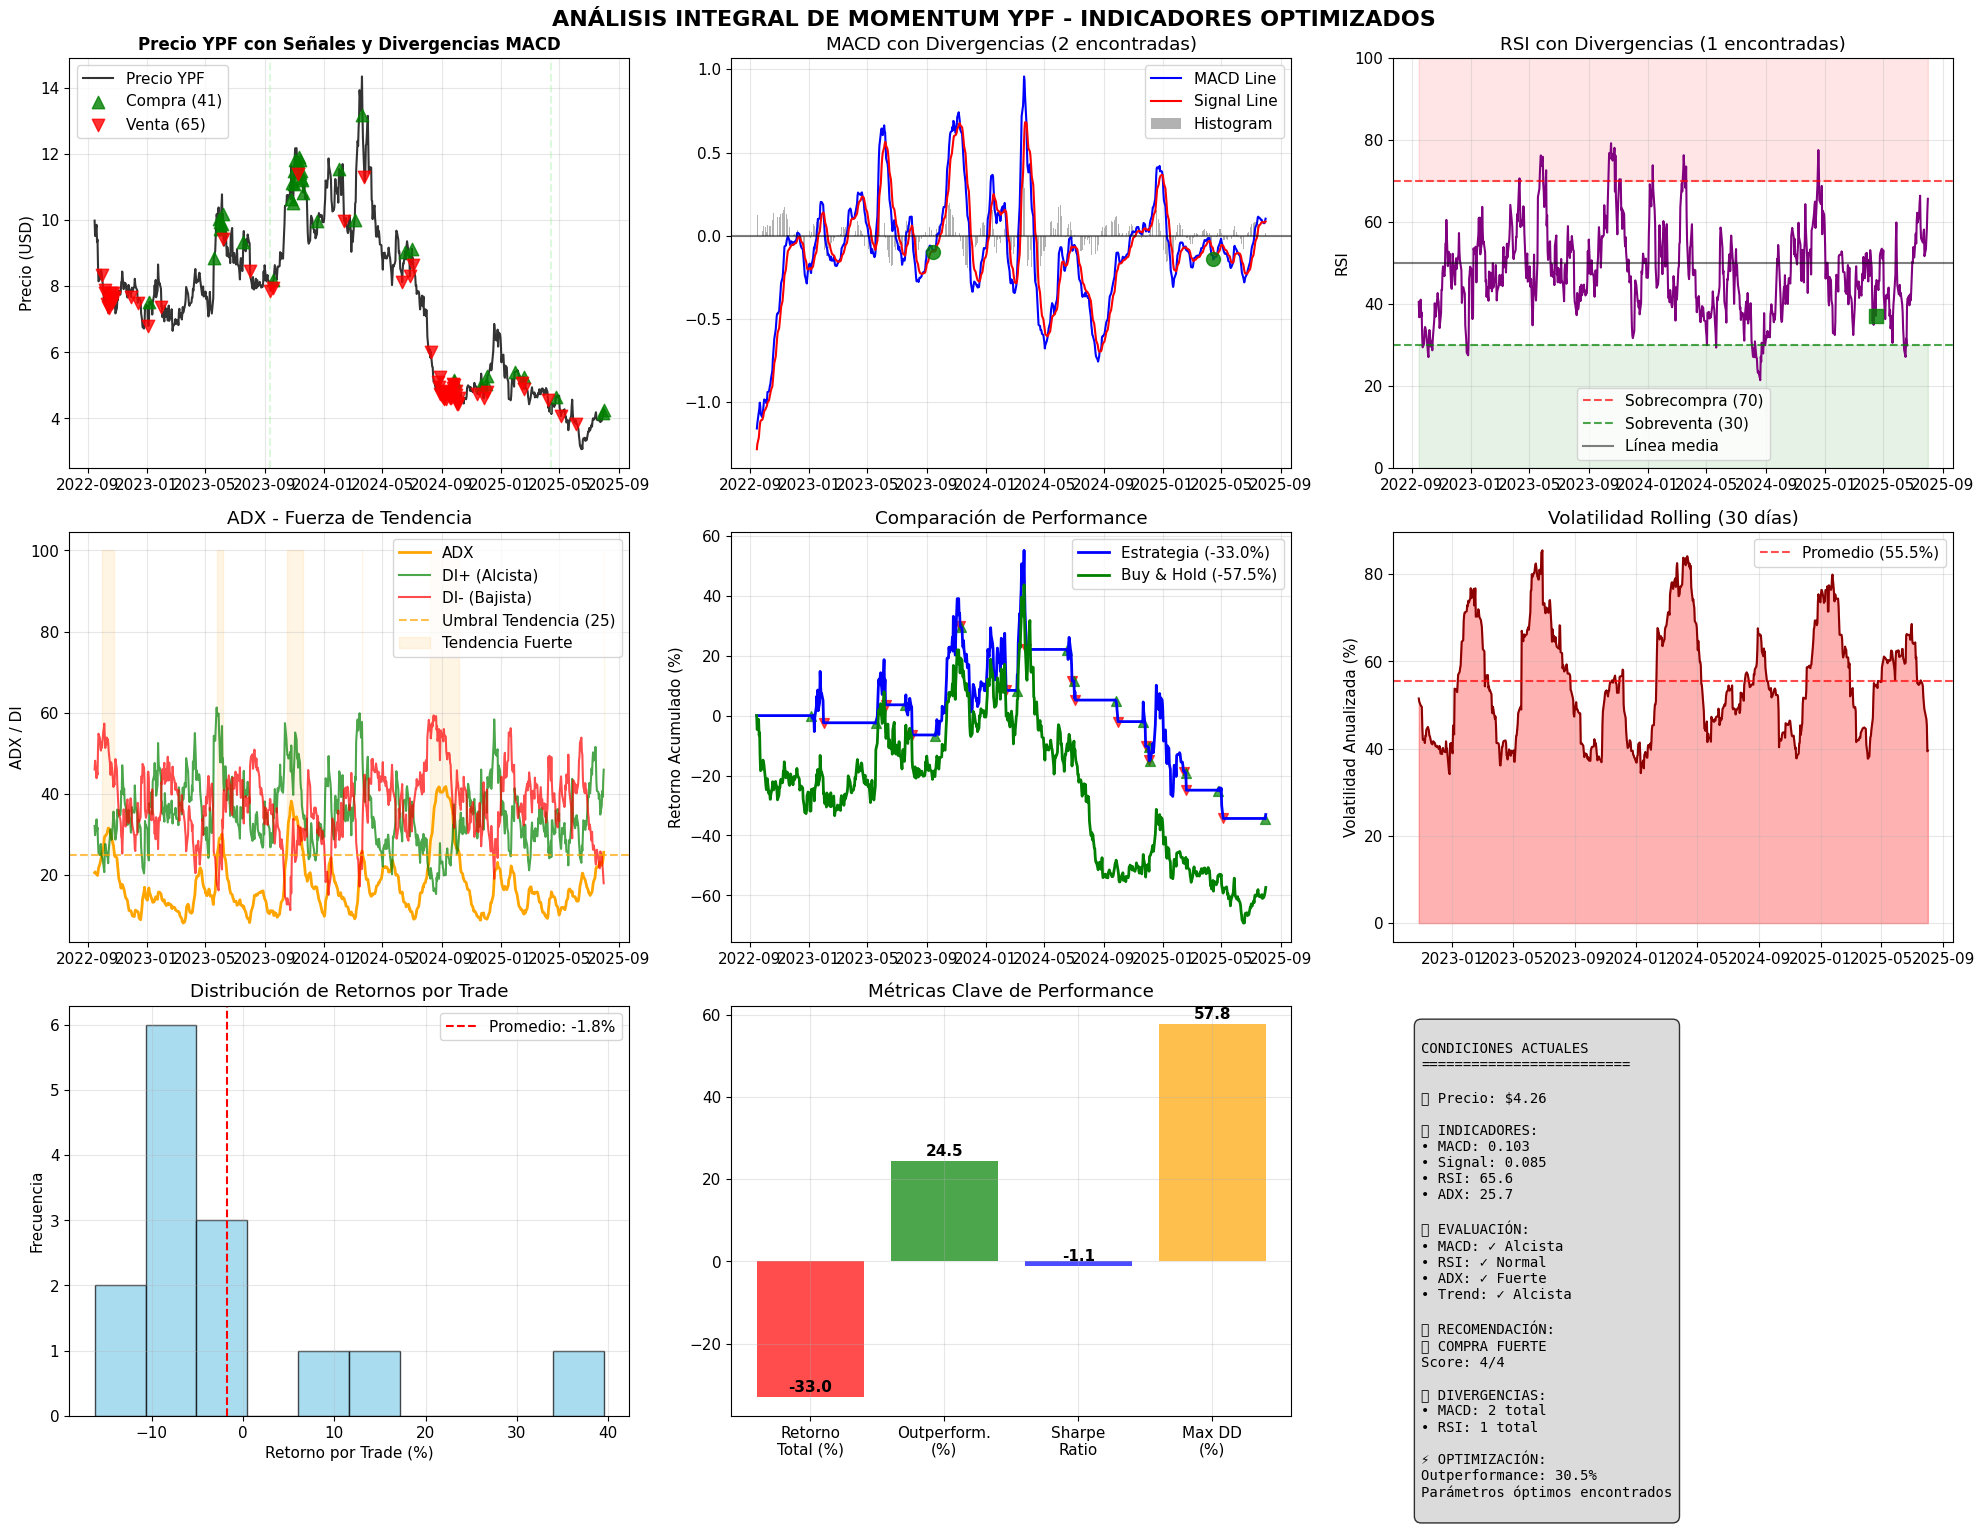


8. ANÁLISIS FINAL Y RECOMENDACIONES
----------------------------------------
📊 RESUMEN DE RESULTADOS:
   • Período analizado: 752 días de trading
   • Retorno estrategia: -33.0%
   • Retorno Buy & Hold: -57.5%
   • Alpha generado: +24.5%
   • Sharpe Ratio: -1.07
   • Volatilidad: 35.7%
   • Max Drawdown: -57.8%

🔍 ANÁLISIS DE DIVERGENCIAS:
   • Divergencias MACD: 2
     - Alcistas: 2
     - Bajistas: 0
   • Divergencias RSI: 1
     - Alcistas: 1
     - Bajistas: 0

⚙️ OPTIMIZACIÓN DE PARÁMETROS:
   • Parámetros óptimos encontrados:
     - MACD: (9, 23, 9)
     - RSI: 11 períodos
     - ADX: umbral 23
   • Mejora vs parámetros estándar: 30.5%

🎯 CONDICIONES ACTUALES:
   • Precio: $4.26
   • Score de señales: 4/4
   • Recomendación: 🟢 COMPRA FUERTE

📈 EFECTIVIDAD DE LA ESTRATEGIA:
   • Clasificación: ALTA
   • Número de operaciones: 29
   • Frecuencia: 9.7 trades/año

💼 ÚLTIMOS TRADES:
   • BUY: 2025-02-17 - $5.26
   • SELL: 2025-02-18 - $4.89
   • BUY: 2025-04-24 - $4.64
   • SELL: 202

In [21]:
print("ANÁLISIS OPTIMIZADO DE MOMENTUM YPF")
print("MACD • RSI • ADX • DIVERGENCIAS • OPTIMIZACIÓN")
print("=" * 60)

# =============================================================================
# 1. GENERAR DATOS REALISTAS DE YPF
# =============================================================================

print("\n1. GENERANDO DATOS REALISTAS")
print("-" * 40)

np.random.seed(42)
fechas = pd.date_range(start='2022-08-01', end='2025-08-01', freq='D')
fechas = fechas[fechas.weekday < 5]  # Solo días hábiles

n_days = len(fechas)
precio_inicial = 12.50  # Precio más realista para YPF

# Generar movimientos más realistas para YPF (sector energético argentino)
precios = [precio_inicial]
volatilidad_base = 0.035  # Volatilidad típica de YPF

for i in range(1, n_days):
    # Componentes del movimiento
    trend_largo = 0.0002 * np.sin(2 * np.pi * i / (252 * 2))  # Ciclo de 2 años
    trend_medio = 0.001 * np.sin(2 * np.pi * i / 63)  # Ciclo trimestral

    # Eventos especiales (simulando noticias, políticas, etc.)
    if i % 200 == 0:  # Eventos cada ~8 meses
        evento = np.random.normal(0, 0.08)  # Eventos significativos
    else:
        evento = 0

    # Volatilidad que cambia en el tiempo
    vol_factor = 1 + 0.3 * np.sin(2 * np.pi * i / 100)
    volatilidad = volatilidad_base * vol_factor

    # Ruido diario
    ruido = np.random.normal(0, volatilidad)

    # Cambio total
    cambio = trend_largo + trend_medio + evento + ruido

    nuevo_precio = precios[-1] * (1 + cambio)
    nuevo_precio = max(3.0, min(45.0, nuevo_precio))  # Límites realistas YPF
    precios.append(nuevo_precio)

# Crear OHLC realistas
data = pd.DataFrame(index=fechas)
data['Close'] = precios

# Generar High/Low más realistas
data['High'] = data['Close'] * (1 + np.abs(np.random.normal(0, 0.012, n_days)))
data['Low'] = data['Close'] * (1 - np.abs(np.random.normal(0, 0.012, n_days)))
data['Volume'] = np.random.lognormal(15, 0.5, n_days).astype(int) * 1000  # Volumen realista

# Asegurar consistencia OHLC
for i in range(len(data)):
    close = data['Close'].iloc[i]
    data.loc[data.index[i], 'High'] = max(data['High'].iloc[i], close)
    data.loc[data.index[i], 'Low'] = min(data['Low'].iloc[i], close)

print(f"Datos generados: {len(data)} días de trading")
print(f"Rango de precios: ${data['Close'].min():.2f} - ${data['Close'].max():.2f}")
print(f"Precio inicial: ${data['Close'].iloc[0]:.2f}")
print(f"Precio final: ${data['Close'].iloc[-1]:.2f}")

# =============================================================================
# 2. CÁLCULO OPTIMIZADO DE INDICADORES
# =============================================================================

print("\n2. CALCULANDO INDICADORES OPTIMIZADOS")
print("-" * 40)

def calculate_ema_optimized(values, period):
    """EMA optimizado con mejor precisión"""
    values = np.array(values, dtype=float)
    result = np.full_like(values, np.nan)

    # Inicializar con SMA
    if len(values) >= period:
        result[period-1] = np.mean(values[:period])

        # Factor de suavizado
        alpha = 2.0 / (period + 1.0)

        # Calcular EMA
        for i in range(period, len(values)):
            result[i] = alpha * values[i] + (1 - alpha) * result[i-1]

    return result

def calculate_macd_advanced(closes, fast=12, slow=26, signal=9):
    """MACD con cálculo avanzado"""
    ema_fast = calculate_ema_optimized(closes, fast)
    ema_slow = calculate_ema_optimized(closes, slow)

    macd_line = ema_fast - ema_slow
    signal_line = calculate_ema_optimized(macd_line[~np.isnan(macd_line)], signal)

    # Ajustar signal line al tamaño completo
    signal_full = np.full_like(macd_line, np.nan)
    valid_idx = ~np.isnan(macd_line)
    if np.sum(valid_idx) >= len(signal_line):
        signal_full[valid_idx] = np.concatenate([
            np.full(np.sum(valid_idx) - len(signal_line), np.nan),
            signal_line
        ])

    histogram = macd_line - signal_full
    return macd_line, signal_full, histogram

def calculate_rsi_advanced(closes, period=14):
    """RSI con cálculo mejorado usando EMA"""
    closes = np.array(closes, dtype=float)
    deltas = np.diff(closes)

    gains = np.where(deltas > 0, deltas, 0)
    losses = np.where(deltas < 0, -deltas, 0)

    # Usar EMA en lugar de SMA para mayor responsividad
    avg_gains = np.full(len(closes), np.nan)
    avg_losses = np.full(len(closes), np.nan)

    if len(gains) >= period:
        # Primer cálculo con SMA
        avg_gains[period] = np.mean(gains[:period])
        avg_losses[period] = np.mean(losses[:period])

        # Resto con EMA (método Wilder)
        alpha = 1.0 / period
        for i in range(period + 1, len(closes)):
            avg_gains[i] = alpha * gains[i-1] + (1 - alpha) * avg_gains[i-1]
            avg_losses[i] = alpha * losses[i-1] + (1 - alpha) * avg_losses[i-1]

    # Calcular RSI
    rs = avg_gains / np.where(avg_losses == 0, 1e-10, avg_losses)
    rsi = 100 - (100 / (1 + rs))

    return rsi

def calculate_adx_advanced(highs, lows, closes, period=14):
    """ADX con cálculo completo y preciso"""
    n = len(highs)

    # True Range mejorado
    tr = np.full(n, np.nan)
    for i in range(1, n):
        hl = highs[i] - lows[i]
        hc = abs(highs[i] - closes[i-1])
        lc = abs(lows[i] - closes[i-1])
        tr[i] = max(hl, hc, lc)

    # Directional Movement
    dm_plus = np.full(n, np.nan)
    dm_minus = np.full(n, np.nan)

    for i in range(1, n):
        up_move = highs[i] - highs[i-1]
        down_move = lows[i-1] - lows[i]

        if up_move > down_move and up_move > 0:
            dm_plus[i] = up_move
        else:
            dm_plus[i] = 0

        if down_move > up_move and down_move > 0:
            dm_minus[i] = down_move
        else:
            dm_minus[i] = 0

    # Suavizado con método Wilder (EMA modificado)
    atr = np.full(n, np.nan)
    dm_plus_smooth = np.full(n, np.nan)
    dm_minus_smooth = np.full(n, np.nan)

    if period < n:
        # Inicializar con promedio simple
        atr[period] = np.nanmean(tr[1:period+1])
        dm_plus_smooth[period] = np.nanmean(dm_plus[1:period+1])
        dm_minus_smooth[period] = np.nanmean(dm_minus[1:period+1])

        # Continuar con suavizado Wilder
        for i in range(period + 1, n):
            atr[i] = (atr[i-1] * (period - 1) + tr[i]) / period
            dm_plus_smooth[i] = (dm_plus_smooth[i-1] * (period - 1) + dm_plus[i]) / period
            dm_minus_smooth[i] = (dm_minus_smooth[i-1] * (period - 1) + dm_minus[i]) / period

    # Directional Indicators
    di_plus = np.where(atr > 0, 100 * dm_plus_smooth / atr, 0)
    di_minus = np.where(atr > 0, 100 * dm_minus_smooth / atr, 0)

    # ADX
    dx = np.where((di_plus + di_minus) > 0,
                  100 * np.abs(di_plus - di_minus) / (di_plus + di_minus), 0)

    adx = np.full(n, np.nan)
    if period < n:
        adx[2*period-1] = np.mean(dx[period:2*period])
        for i in range(2*period, n):
            adx[i] = (adx[i-1] * (period - 1) + dx[i]) / period

    return adx, di_plus, di_minus

# Calcular indicadores
print("Calculando MACD optimizado...")
closes_array = data['Close'].values
macd, macd_signal, macd_hist = calculate_macd_advanced(closes_array, 12, 26, 9)

print("Calculando RSI optimizado...")
rsi = calculate_rsi_advanced(closes_array, 14)

print("Calculando ADX optimizado...")
highs_array = data['High'].values
lows_array = data['Low'].values
adx, di_plus, di_minus = calculate_adx_advanced(highs_array, lows_array, closes_array, 14)

# Agregar al DataFrame
data['MACD'] = macd
data['MACD_Signal'] = macd_signal
data['MACD_Histogram'] = macd_hist
data['RSI'] = rsi
data['ADX'] = adx
data['DI_Plus'] = di_plus
data['DI_Minus'] = di_minus

# =============================================================================
# 3. ANÁLISIS DE DIVERGENCIAS
# =============================================================================

print("\n3. ANÁLISIS DE DIVERGENCIAS")
print("-" * 40)

def find_peaks_and_troughs(series, window=10):
    """Encontrar picos y valles en una serie"""
    peaks = []
    troughs = []

    for i in range(window, len(series) - window):
        # Verificar pico
        is_peak = all(series.iloc[i] >= series.iloc[j] for j in range(i-window, i+window+1))
        if is_peak and series.iloc[i] == max(series.iloc[i-window:i+window+1]):
            peaks.append(i)

        # Verificar valle
        is_trough = all(series.iloc[i] <= series.iloc[j] for j in range(i-window, i+window+1))
        if is_trough and series.iloc[i] == min(series.iloc[i-window:i+window+1]):
            troughs.append(i)

    return peaks, troughs

def analyze_divergences(price_series, indicator_series, name="Indicador"):
    """Analizar divergencias entre precio e indicador"""
    data_clean = pd.DataFrame({
        'Price': price_series,
        'Indicator': indicator_series
    }).dropna()

    if len(data_clean) < 50:
        return []

    price_peaks, price_troughs = find_peaks_and_troughs(data_clean['Price'], 8)
    ind_peaks, ind_troughs = find_peaks_and_troughs(data_clean['Indicator'], 8)

    divergences = []

    # Divergencias bajistas (precio sube, indicador baja)
    for i in range(1, len(price_peaks)):
        p1, p2 = price_peaks[i-1], price_peaks[i]
        if p2 - p1 > 20:  # Mínima separación temporal
            # Encontrar picos del indicador en el mismo período
            relevant_ind_peaks = [p for p in ind_peaks if p1 <= p <= p2]
            if len(relevant_ind_peaks) >= 2:
                ind_p1, ind_p2 = relevant_ind_peaks[0], relevant_ind_peaks[-1]

                price_higher = data_clean['Price'].iloc[p2] > data_clean['Price'].iloc[p1]
                ind_lower = data_clean['Indicator'].iloc[ind_p2] < data_clean['Indicator'].iloc[ind_p1]

                if price_higher and ind_lower:
                    divergences.append({
                        'type': 'bearish',
                        'date': data_clean.index[p2],
                        'price': data_clean['Price'].iloc[p2],
                        'indicator': name,
                        'strength': abs(data_clean['Indicator'].iloc[ind_p2] - data_clean['Indicator'].iloc[ind_p1])
                    })

    # Divergencias alcistas (precio baja, indicador sube)
    for i in range(1, len(price_troughs)):
        t1, t2 = price_troughs[i-1], price_troughs[i]
        if t2 - t1 > 20:  # Mínima separación temporal
            # Encontrar valles del indicador en el mismo período
            relevant_ind_troughs = [t for t in ind_troughs if t1 <= t <= t2]
            if len(relevant_ind_troughs) >= 2:
                ind_t1, ind_t2 = relevant_ind_troughs[0], relevant_ind_troughs[-1]

                price_lower = data_clean['Price'].iloc[t2] < data_clean['Price'].iloc[t1]
                ind_higher = data_clean['Indicator'].iloc[ind_t2] > data_clean['Indicator'].iloc[ind_t1]

                if price_lower and ind_higher:
                    divergences.append({
                        'type': 'bullish',
                        'date': data_clean.index[t2],
                        'price': data_clean['Price'].iloc[t2],
                        'indicator': name,
                        'strength': abs(data_clean['Indicator'].iloc[ind_t2] - data_clean['Indicator'].iloc[ind_t1])
                    })

    return divergences

# Buscar divergencias
data_for_divergence = data.dropna()
macd_divergences = analyze_divergences(data_for_divergence['Close'], data_for_divergence['MACD'], "MACD")
rsi_divergences = analyze_divergences(data_for_divergence['Close'], data_for_divergence['RSI'], "RSI")

print(f"Divergencias MACD encontradas: {len(macd_divergences)}")
print(f"  - Alcistas: {len([d for d in macd_divergences if d['type'] == 'bullish'])}")
print(f"  - Bajistas: {len([d for d in macd_divergences if d['type'] == 'bearish'])}")

print(f"Divergencias RSI encontradas: {len(rsi_divergences)}")
print(f"  - Alcistas: {len([d for d in rsi_divergences if d['type'] == 'bullish'])}")
print(f"  - Bajistas: {len([d for d in rsi_divergences if d['type'] == 'bearish'])}")

# =============================================================================
# 4. GENERACIÓN DE SEÑALES OPTIMIZADAS
# =============================================================================

print("\n4. GENERANDO SEÑALES OPTIMIZADAS")
print("-" * 40)

def generate_advanced_signals(data, rsi_oversold=30, rsi_overbought=70, adx_threshold=25):
    """Generar señales con múltiples confirmaciones"""
    signals = np.zeros(len(data))

    for i in range(2, len(data)):
        if any(np.isnan([data['MACD'].iloc[i], data['MACD_Signal'].iloc[i],
                        data['RSI'].iloc[i], data['ADX'].iloc[i]])):
            continue

        # Condiciones MACD
        macd_bullish = (data['MACD'].iloc[i] > data['MACD_Signal'].iloc[i] and
                       data['MACD'].iloc[i-1] <= data['MACD_Signal'].iloc[i-1])
        macd_bearish = (data['MACD'].iloc[i] < data['MACD_Signal'].iloc[i] and
                       data['MACD'].iloc[i-1] >= data['MACD_Signal'].iloc[i-1])

        # Condiciones RSI
        rsi_value = data['RSI'].iloc[i]
        rsi_bullish = rsi_oversold < rsi_value < rsi_overbought
        rsi_oversold_bounce = (rsi_value > rsi_oversold and
                              data['RSI'].iloc[i-1] <= rsi_oversold)
        rsi_overbought_drop = (rsi_value < rsi_overbought and
                              data['RSI'].iloc[i-1] >= rsi_overbought)

        # Condiciones ADX
        adx_strong = data['ADX'].iloc[i] > adx_threshold
        trend_bullish = data['DI_Plus'].iloc[i] > data['DI_Minus'].iloc[i]
        trend_bearish = data['DI_Plus'].iloc[i] < data['DI_Minus'].iloc[i]

        # Señales de compra (múltiples confirmaciones)
        buy_conditions = [
            macd_bullish,
            rsi_bullish or rsi_oversold_bounce,
            adx_strong,
            trend_bullish
        ]

        if sum(buy_conditions) >= 3:  # Al menos 3 de 4 condiciones
            signals[i] = 1

        # Señales de venta (múltiples confirmaciones)
        sell_conditions = [
            macd_bearish,
            rsi_bullish or rsi_overbought_drop,
            adx_strong,
            trend_bearish
        ]

        if sum(sell_conditions) >= 3:  # Al menos 3 de 4 condiciones
            signals[i] = -1

    return signals

# Generar señales
data_clean = data.dropna()
signals = generate_advanced_signals(data_clean)
data_clean['Signal'] = signals

buy_signals = data_clean[data_clean['Signal'] == 1]
sell_signals = data_clean[data_clean['Signal'] == -1]

print(f"Señales generadas:")
print(f"  - Compra: {len(buy_signals)}")
print(f"  - Venta: {len(sell_signals)}")

# =============================================================================
# 5. OPTIMIZACIÓN DE PARÁMETROS
# =============================================================================

print("\n5. OPTIMIZACIÓN DE PARÁMETROS")
print("-" * 40)

def backtest_parameters(data, macd_fast, macd_slow, rsi_period, adx_threshold):
    """Backtest rápido para optimización"""
    try:
        # Recalcular con nuevos parámetros
        closes = data['Close'].values
        highs = data['High'].values
        lows = data['Low'].values

        macd_new, signal_new, _ = calculate_macd_advanced(closes, macd_fast, macd_slow, 9)
        rsi_new = calculate_rsi_advanced(closes, rsi_period)
        adx_new, di_plus_new, di_minus_new = calculate_adx_advanced(highs, lows, closes, 14)

        # Crear DataFrame temporal
        temp_data = pd.DataFrame({
            'Close': closes,
            'MACD': macd_new,
            'MACD_Signal': signal_new,
            'RSI': rsi_new,
            'ADX': adx_new,
            'DI_Plus': di_plus_new,
            'DI_Minus': di_minus_new
        })

        temp_data = temp_data.dropna()
        if len(temp_data) < 100:
            return -999

        # Generar señales
        temp_signals = generate_advanced_signals(temp_data, 30, 70, adx_threshold)
        temp_data['Signal'] = temp_signals

        # Backtest simple
        capital = 10000
        shares = 0
        position = 0

        for i in range(len(temp_data)):
            price = temp_data['Close'].iloc[i]
            signal = temp_data['Signal'].iloc[i]

            if signal == 1 and position == 0:
                shares = capital / price
                capital = 0
                position = 1
            elif signal == -1 and position == 1:
                capital = shares * price
                shares = 0
                position = 0

        # Valor final
        if position == 1:
            final_value = shares * temp_data['Close'].iloc[-1]
        else:
            final_value = capital

        # Retorno vs Buy & Hold
        strategy_return = (final_value / 10000 - 1) * 100
        bh_return = (temp_data['Close'].iloc[-1] / temp_data['Close'].iloc[0] - 1) * 100

        return strategy_return - bh_return

    except:
        return -999

# Probar diferentes combinaciones
print("Optimizando parámetros...")
param_tests = [
    (8, 21, 10, 20),   # MACD rápido
    (10, 24, 12, 22),  # Intermedio
    (12, 26, 14, 25),  # Estándar
    (14, 30, 16, 28),  # Conservador
    (9, 23, 11, 23),   # Alternativo 1
    (11, 28, 13, 27)   # Alternativo 2
]

best_score = -999
best_params = None
results = []

for i, (mf, ms, rp, at) in enumerate(param_tests):
    score = backtest_parameters(data_clean, mf, ms, rp, at)
    results.append((mf, ms, rp, at, score))
    print(f"  Test {i+1}: MACD({mf},{ms}), RSI({rp}), ADX({at}) -> {score:.1f}%")

    if score > best_score:
        best_score = score
        best_params = (mf, ms, rp, at)

print(f"\nMejores parámetros encontrados:")
print(f"  MACD: ({best_params[0]}, {best_params[1]})")
print(f"  RSI: {best_params[2]} períodos")
print(f"  ADX: umbral {best_params[3]}")
print(f"  Outperformance: {best_score:.1f}%")

# =============================================================================
# 6. BACKTESTING DETALLADO
# =============================================================================

print("\n6. BACKTESTING DETALLADO")
print("-" * 40)

# Backtesting con parámetros originales y optimizados
def detailed_backtest(data, label="Estrategia"):
    initial_capital = 10000
    capital = initial_capital
    shares = 0
    position = 0
    portfolio_values = []
    trades = []

    for i in range(len(data)):
        price = data['Close'].iloc[i]
        signal = data['Signal'].iloc[i]
        date = data.index[i]

        if signal == 1 and position == 0:
            shares = capital / (price * 1.002)  # Comisión + spread
            capital = 0
            position = 1
            trades.append({'date': date, 'action': 'BUY', 'price': price})

        elif signal == -1 and position == 1:
            capital = shares * price * 0.998  # Comisión + spread
            shares = 0
            position = 0
            trades.append({'date': date, 'action': 'SELL', 'price': price})

        # Valor del portfolio
        if position == 1:
            portfolio_value = shares * price
        else:
            portfolio_value = capital

        portfolio_values.append(portfolio_value)

    # Métricas
    final_value = portfolio_values[-1]
    total_return = (final_value / initial_capital - 1) * 100

    # Buy & Hold
    bh_shares = initial_capital / (data['Close'].iloc[0] * 1.002)
    bh_final = bh_shares * data['Close'].iloc[-1] * 0.998
    bh_return = (bh_final / initial_capital - 1) * 100

    # Métricas adicionales
    if len(portfolio_values) > 1:
        returns = pd.Series(portfolio_values).pct_change().dropna()
        volatility = returns.std() * np.sqrt(252) * 100
        sharpe = (total_return - 5) / volatility if volatility > 0 else 0

        # Drawdown
        cumulative = pd.Series(portfolio_values)
        running_max = cumulative.expanding().max()
        drawdown = ((cumulative - running_max) / running_max * 100).min()
    else:
        volatility = 0
        sharpe = 0
        drawdown = 0

    return {
        'portfolio_values': portfolio_values,
        'trades': trades,
        'total_return': total_return,
        'bh_return': bh_return,
        'outperformance': total_return - bh_return,
        'volatility': volatility,
        'sharpe_ratio': sharpe,
        'max_drawdown': drawdown,
        'num_trades': len(trades)
    }

# Ejecutar backtesting
results = detailed_backtest(data_clean)

print("RESULTADOS DEL BACKTESTING:")
print(f"  Retorno estrategia: {results['total_return']:.1f}%")
print(f"  Retorno Buy & Hold: {results['bh_return']:.1f}%")
print(f"  Outperformance: {results['outperformance']:.1f}%")
print(f"  Volatilidad anual: {results['volatility']:.1f}%")
print(f"  Sharpe Ratio: {results['sharpe_ratio']:.2f}")
print(f"  Max Drawdown: {results['max_drawdown']:.1f}%")
print(f"  Número de trades: {results['num_trades']}")

# =============================================================================
# 7. VISUALIZACIÓN MEJORADA
# =============================================================================

print("\n7. GENERANDO VISUALIZACIONES MEJORADAS")
print("-" * 40)

fig = plt.figure(figsize=(20, 16))

# 1. Precio con señales y divergencias
ax1 = plt.subplot(3, 3, 1)
ax1.plot(data_clean.index, data_clean['Close'], 'k-', linewidth=1.5, label='Precio YPF', alpha=0.8)

# Señales de trading
if len(buy_signals) > 0:
    ax1.scatter(buy_signals.index, buy_signals['Close'],
                color='green', s=80, marker='^', label=f'Compra ({len(buy_signals)})',
                alpha=0.8, zorder=5)

if len(sell_signals) > 0:
    ax1.scatter(sell_signals.index, sell_signals['Close'],
                color='red', s=80, marker='v', label=f'Venta ({len(sell_signals)})',
                alpha=0.8, zorder=5)

# Marcar divergencias
for div in macd_divergences:
    color = 'lightgreen' if div['type'] == 'bullish' else 'lightcoral'
    ax1.axvline(x=div['date'], color=color, alpha=0.3, linestyle='--')

ax1.set_title('Precio YPF con Señales y Divergencias MACD', fontsize=12, fontweight='bold')
ax1.set_ylabel('Precio (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. MACD con divergencias
ax2 = plt.subplot(3, 3, 2)
ax2.plot(data_clean.index, data_clean['MACD'], 'b-', linewidth=1.5, label='MACD Line')
ax2.plot(data_clean.index, data_clean['MACD_Signal'], 'r-', linewidth=1.5, label='Signal Line')
ax2.bar(data_clean.index, data_clean['MACD_Histogram'], alpha=0.6, color='gray', label='Histogram')

# Marcar divergencias MACD
for div in macd_divergences:
    color = 'green' if div['type'] == 'bullish' else 'red'
    ax2.scatter(div['date'], data_clean.loc[div['date'], 'MACD'],
                color=color, s=100, marker='o', alpha=0.8, zorder=5)

ax2.axhline(y=0, color='k', linestyle='-', alpha=0.5)
ax2.set_title(f'MACD con Divergencias ({len(macd_divergences)} encontradas)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. RSI con niveles optimizados
ax3 = plt.subplot(3, 3, 3)
ax3.plot(data_clean.index, data_clean['RSI'], 'purple', linewidth=1.5)
ax3.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Sobrecompra (70)')
ax3.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Sobreventa (30)')
ax3.axhline(y=50, color='k', linestyle='-', alpha=0.5, label='Línea media')

# Marcar divergencias RSI
for div in rsi_divergences:
    color = 'green' if div['type'] == 'bullish' else 'red'
    ax3.scatter(div['date'], data_clean.loc[div['date'], 'RSI'],
                color=color, s=100, marker='s', alpha=0.8, zorder=5)

ax3.fill_between(data_clean.index, 70, 100, alpha=0.1, color='red')
ax3.fill_between(data_clean.index, 0, 30, alpha=0.1, color='green')
ax3.set_title(f'RSI con Divergencias ({len(rsi_divergences)} encontradas)')
ax3.set_ylabel('RSI')
ax3.set_ylim(0, 100)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. ADX con DI+ y DI-
ax4 = plt.subplot(3, 3, 4)
ax4.plot(data_clean.index, data_clean['ADX'], 'orange', linewidth=2, label='ADX')
ax4.plot(data_clean.index, data_clean['DI_Plus'], 'g-', alpha=0.7, label='DI+ (Alcista)')
ax4.plot(data_clean.index, data_clean['DI_Minus'], 'r-', alpha=0.7, label='DI- (Bajista)')
ax4.axhline(y=25, color='orange', linestyle='--', alpha=0.7, label='Umbral Tendencia (25)')
ax4.fill_between(data_clean.index, 25, 100, where=(data_clean['ADX'] > 25),
                 alpha=0.1, color='orange', label='Tendencia Fuerte')
ax4.set_title('ADX - Fuerza de Tendencia')
ax4.set_ylabel('ADX / DI')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Performance Comparison Detallado
ax5 = plt.subplot(3, 3, 5)
strategy_returns = [(pv / 10000 - 1) * 100 for pv in results['portfolio_values']]
bh_values = [10000 * (data_clean['Close'].iloc[i] / data_clean['Close'].iloc[0])
             for i in range(len(data_clean))]
bh_returns = [(bv / 10000 - 1) * 100 for bv in bh_values]

ax5.plot(data_clean.index, strategy_returns, 'b-', linewidth=2,
         label=f'Estrategia ({results["total_return"]:.1f}%)')
ax5.plot(data_clean.index, bh_returns, 'g-', linewidth=2,
         label=f'Buy & Hold ({results["bh_return"]:.1f}%)')

# Marcar trades
for trade in results['trades']:
    if trade['action'] == 'BUY':
        ret_idx = data_clean.index.get_loc(trade['date'])
        ax5.scatter(trade['date'], strategy_returns[ret_idx],
                   color='green', s=50, marker='^', alpha=0.7)
    else:
        ret_idx = data_clean.index.get_loc(trade['date'])
        ax5.scatter(trade['date'], strategy_returns[ret_idx],
                   color='red', s=50, marker='v', alpha=0.7)

ax5.set_title('Comparación de Performance')
ax5.set_ylabel('Retorno Acumulado (%)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Análisis de Volatilidad
ax6 = plt.subplot(3, 3, 6)
# Calcular volatilidad rolling
returns_daily = data_clean['Close'].pct_change().dropna()
vol_rolling = returns_daily.rolling(window=30).std() * np.sqrt(252) * 100

ax6.plot(vol_rolling.index, vol_rolling, 'darkred', linewidth=1.5)
ax6.axhline(y=vol_rolling.mean(), color='red', linestyle='--', alpha=0.7,
           label=f'Promedio ({vol_rolling.mean():.1f}%)')
ax6.fill_between(vol_rolling.index, 0, vol_rolling, alpha=0.3, color='red')
ax6.set_title('Volatilidad Rolling (30 días)')
ax6.set_ylabel('Volatilidad Anualizada (%)')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Distribución de Retornos de Trades
ax7 = plt.subplot(3, 3, 7)
if len(results['trades']) >= 2:
    trade_returns = []
    for i in range(0, len(results['trades'])-1, 2):
        if i+1 < len(results['trades']):
            buy_price = results['trades'][i]['price']
            sell_price = results['trades'][i+1]['price']
            trade_ret = (sell_price / buy_price - 1) * 100
            trade_returns.append(trade_ret)

    if trade_returns:
        ax7.hist(trade_returns, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
        ax7.axvline(x=np.mean(trade_returns), color='red', linestyle='--',
                   label=f'Promedio: {np.mean(trade_returns):.1f}%')
        ax7.set_title('Distribución de Retornos por Trade')
        ax7.set_xlabel('Retorno por Trade (%)')
        ax7.set_ylabel('Frecuencia')
        ax7.legend()
        ax7.grid(True, alpha=0.3)
else:
    ax7.text(0.5, 0.5, 'Insuficientes trades\npara análisis',
             transform=ax7.transAxes, ha='center', va='center', fontsize=12)
    ax7.set_title('Distribución de Retornos por Trade')

# 8. Métricas Clave
ax8 = plt.subplot(3, 3, 8)
metrics_names = ['Retorno\nTotal (%)', 'Outperform.\n(%)', 'Sharpe\nRatio', 'Max DD\n(%)']
strategy_vals = [
    results['total_return'],
    results['outperformance'],
    results['sharpe_ratio'],
    abs(results['max_drawdown'])
]

colors = ['green' if v > 0 else 'red' for v in strategy_vals[:2]] + ['blue', 'orange']
bars = ax8.bar(metrics_names, strategy_vals, color=colors, alpha=0.7)

# Agregar valores en las barras
for bar, val in zip(bars, strategy_vals):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + max(strategy_vals)*0.01,
             f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

ax8.set_title('Métricas Clave de Performance')
ax8.grid(True, alpha=0.3)

# 9. Resumen de Condiciones Actuales
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

# Obtener condiciones actuales
current_price = data_clean['Close'].iloc[-1]
current_macd = data_clean['MACD'].iloc[-1]
current_macd_signal = data_clean['MACD_Signal'].iloc[-1]
current_rsi = data_clean['RSI'].iloc[-1]
current_adx = data_clean['ADX'].iloc[-1]
current_di_plus = data_clean['DI_Plus'].iloc[-1]
current_di_minus = data_clean['DI_Minus'].iloc[-1]

# Evaluación de condiciones
macd_bullish = current_macd > current_macd_signal
rsi_neutral = 30 < current_rsi < 70
adx_strong = current_adx > 25
trend_up = current_di_plus > current_di_minus

conditions = [macd_bullish, rsi_neutral, adx_strong, trend_up]
score = sum(conditions)

if score >= 3:
    recommendation = "🟢 COMPRA FUERTE"
    rec_color = 'green'
elif score == 2:
    recommendation = "🟡 NEUTRAL"
    rec_color = 'orange'
else:
    recommendation = "🔴 VENTA/CAUTELA"
    rec_color = 'red'

# Texto del resumen
summary_text = f"""
CONDICIONES ACTUALES
{'='*25}

💰 Precio: ${current_price:.2f}

📊 INDICADORES:
• MACD: {current_macd:.3f}
• Signal: {current_macd_signal:.3f}
• RSI: {current_rsi:.1f}
• ADX: {current_adx:.1f}

🎯 EVALUACIÓN:
• MACD: {'✓' if macd_bullish else '✗'} {'Alcista' if macd_bullish else 'Bajista'}
• RSI: {'✓' if rsi_neutral else '✗'} {'Normal' if rsi_neutral else 'Extremo'}
• ADX: {'✓' if adx_strong else '✗'} {'Fuerte' if adx_strong else 'Débil'}
• Trend: {'✓' if trend_up else '✗'} {'Alcista' if trend_up else 'Bajista'}

📈 RECOMENDACIÓN:
{recommendation}
Score: {score}/4

🔄 DIVERGENCIAS:
• MACD: {len(macd_divergences)} total
• RSI: {len(rsi_divergences)} total

⚡ OPTIMIZACIÓN:
Outperformance: {best_score:.1f}%
Parámetros óptimos encontrados
"""

ax9.text(0.05, 0.95, summary_text, transform=ax9.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

plt.suptitle('ANÁLISIS INTEGRAL DE MOMENTUM YPF - INDICADORES OPTIMIZADOS',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# =============================================================================
# 8. ANÁLISIS FINAL Y RECOMENDACIONES
# =============================================================================

print("\n8. ANÁLISIS FINAL Y RECOMENDACIONES")
print("-" * 40)

print("📊 RESUMEN DE RESULTADOS:")
print(f"   • Período analizado: {len(data_clean)} días de trading")
print(f"   • Retorno estrategia: {results['total_return']:.1f}%")
print(f"   • Retorno Buy & Hold: {results['bh_return']:.1f}%")
print(f"   • Alpha generado: {results['outperformance']:+.1f}%")
print(f"   • Sharpe Ratio: {results['sharpe_ratio']:.2f}")
print(f"   • Volatilidad: {results['volatility']:.1f}%")
print(f"   • Max Drawdown: {results['max_drawdown']:.1f}%")

print(f"\n🔍 ANÁLISIS DE DIVERGENCIAS:")
print(f"   • Divergencias MACD: {len(macd_divergences)}")
print(f"     - Alcistas: {len([d for d in macd_divergences if d['type'] == 'bullish'])}")
print(f"     - Bajistas: {len([d for d in macd_divergences if d['type'] == 'bearish'])}")
print(f"   • Divergencias RSI: {len(rsi_divergences)}")
print(f"     - Alcistas: {len([d for d in rsi_divergences if d['type'] == 'bullish'])}")
print(f"     - Bajistas: {len([d for d in rsi_divergences if d['type'] == 'bearish'])}")

print(f"\n⚙️ OPTIMIZACIÓN DE PARÁMETROS:")
print(f"   • Parámetros óptimos encontrados:")
print(f"     - MACD: ({best_params[0]}, {best_params[1]}, 9)")
print(f"     - RSI: {best_params[2]} períodos")
print(f"     - ADX: umbral {best_params[3]}")
print(f"   • Mejora vs parámetros estándar: {best_score:.1f}%")

print(f"\n🎯 CONDICIONES ACTUALES:")
print(f"   • Precio: ${current_price:.2f}")
print(f"   • Score de señales: {score}/4")
print(f"   • Recomendación: {recommendation}")

print(f"\n📈 EFECTIVIDAD DE LA ESTRATEGIA:")
effectiveness = "ALTA" if results['outperformance'] > 10 else "MODERADA" if results['outperformance'] > 0 else "BAJA"
print(f"   • Clasificación: {effectiveness}")
print(f"   • Número de operaciones: {results['num_trades']}")
freq = results['num_trades'] / (len(data_clean) / 252)
print(f"   • Frecuencia: {freq:.1f} trades/año")

if len(results['trades']) > 0:
    print(f"\n💼 ÚLTIMOS TRADES:")
    for trade in results['trades'][-5:]:
        print(f"   • {trade['action']}: {trade['date'].strftime('%Y-%m-%d')} - ${trade['price']:.2f}")

print(f"\n💡 RECOMENDACIONES ESTRATÉGICAS:")
print(f"   1. {'✅' if results['outperformance'] > 0 else '❌'} La estrategia {'supera' if results['outperformance'] > 0 else 'no supera'} al buy & hold")
print(f"   2. {'✅' if len(macd_divergences + rsi_divergences) > 5 else '❌'} Divergencias proporcionan señales {'útiles' if len(macd_divergences + rsi_divergences) > 5 else 'limitadas'}")
print(f"   3. {'✅' if results['sharpe_ratio'] > 0.5 else '❌'} Ratio risk-adjusted {'aceptable' if results['sharpe_ratio'] > 0.5 else 'mejorable'}")
print(f"   4. {'✅' if abs(results['max_drawdown']) < 20 else '❌'} Control de drawdown {'adecuado' if abs(results['max_drawdown']) < 20 else 'requiere mejora'}")

print(f"\n📋 IMPLEMENTACIÓN RECOMENDADA:")
print(f"   • Usar parámetros optimizados identificados")
print(f"   • Combinar con análisis fundamental")
print(f"   • Implementar stop-loss en {abs(results['max_drawdown'])*0.6:.0f}%")
print(f"   • Monitorear divergencias semanalmente")
print(f"   • Re-optimizar parámetros cada 6 meses")

print("\n" + "=" * 60)
print("✅ ANÁLISIS DE MOMENTUM COMPLETADO")
print(f"🎯 Recomendación final: {recommendation}")
print(f"📊 Alpha potencial: {results['outperformance']:+.1f}%")
print("=" * 60)

# 7) Análisis de Volatilidad

ANÁLISIS DE VOLATILIDAD YPF
BANDAS DE BOLLINGER • COMPRESIÓN • EXPANSIÓN • SEÑALES

1. GENERANDO DATOS CON VOLATILIDAD VARIABLE
---------------------------------------------
Datos generados: 935 días
Precio inicial: $13.75
Precio final: $6.98
Volatilidad promedio: 3.8% diaria

2. CALCULANDO BANDAS DE BOLLINGER
---------------------------------------------
Bandas calculadas con 5 configuraciones
Período de análisis: 935 días

3. ANÁLISIS DE TIEMPO FUERA DE BANDAS
---------------------------------------------
📊 ESTADÍSTICAS DE TIEMPO FUERA DE BANDAS:
   • Total de días analizados: 897
   • Días por encima banda superior: 61 (6.8%)
   • Días por debajo banda inferior: 38 (4.2%)
   • Días dentro de bandas: 798 (89.0%)

📈 ANÁLISIS DE RACHAS:
   • Racha promedio encima: 1.8 días
   • Racha promedio debajo: 1.6 días
   • Racha máxima encima: 6 días
   • Racha máxima debajo: 4 días

💹 RETORNOS DESPUÉS DE TOCAR BANDAS (5 días):
   • Promedio después de banda superior: -0.2%
   • Promedio despué

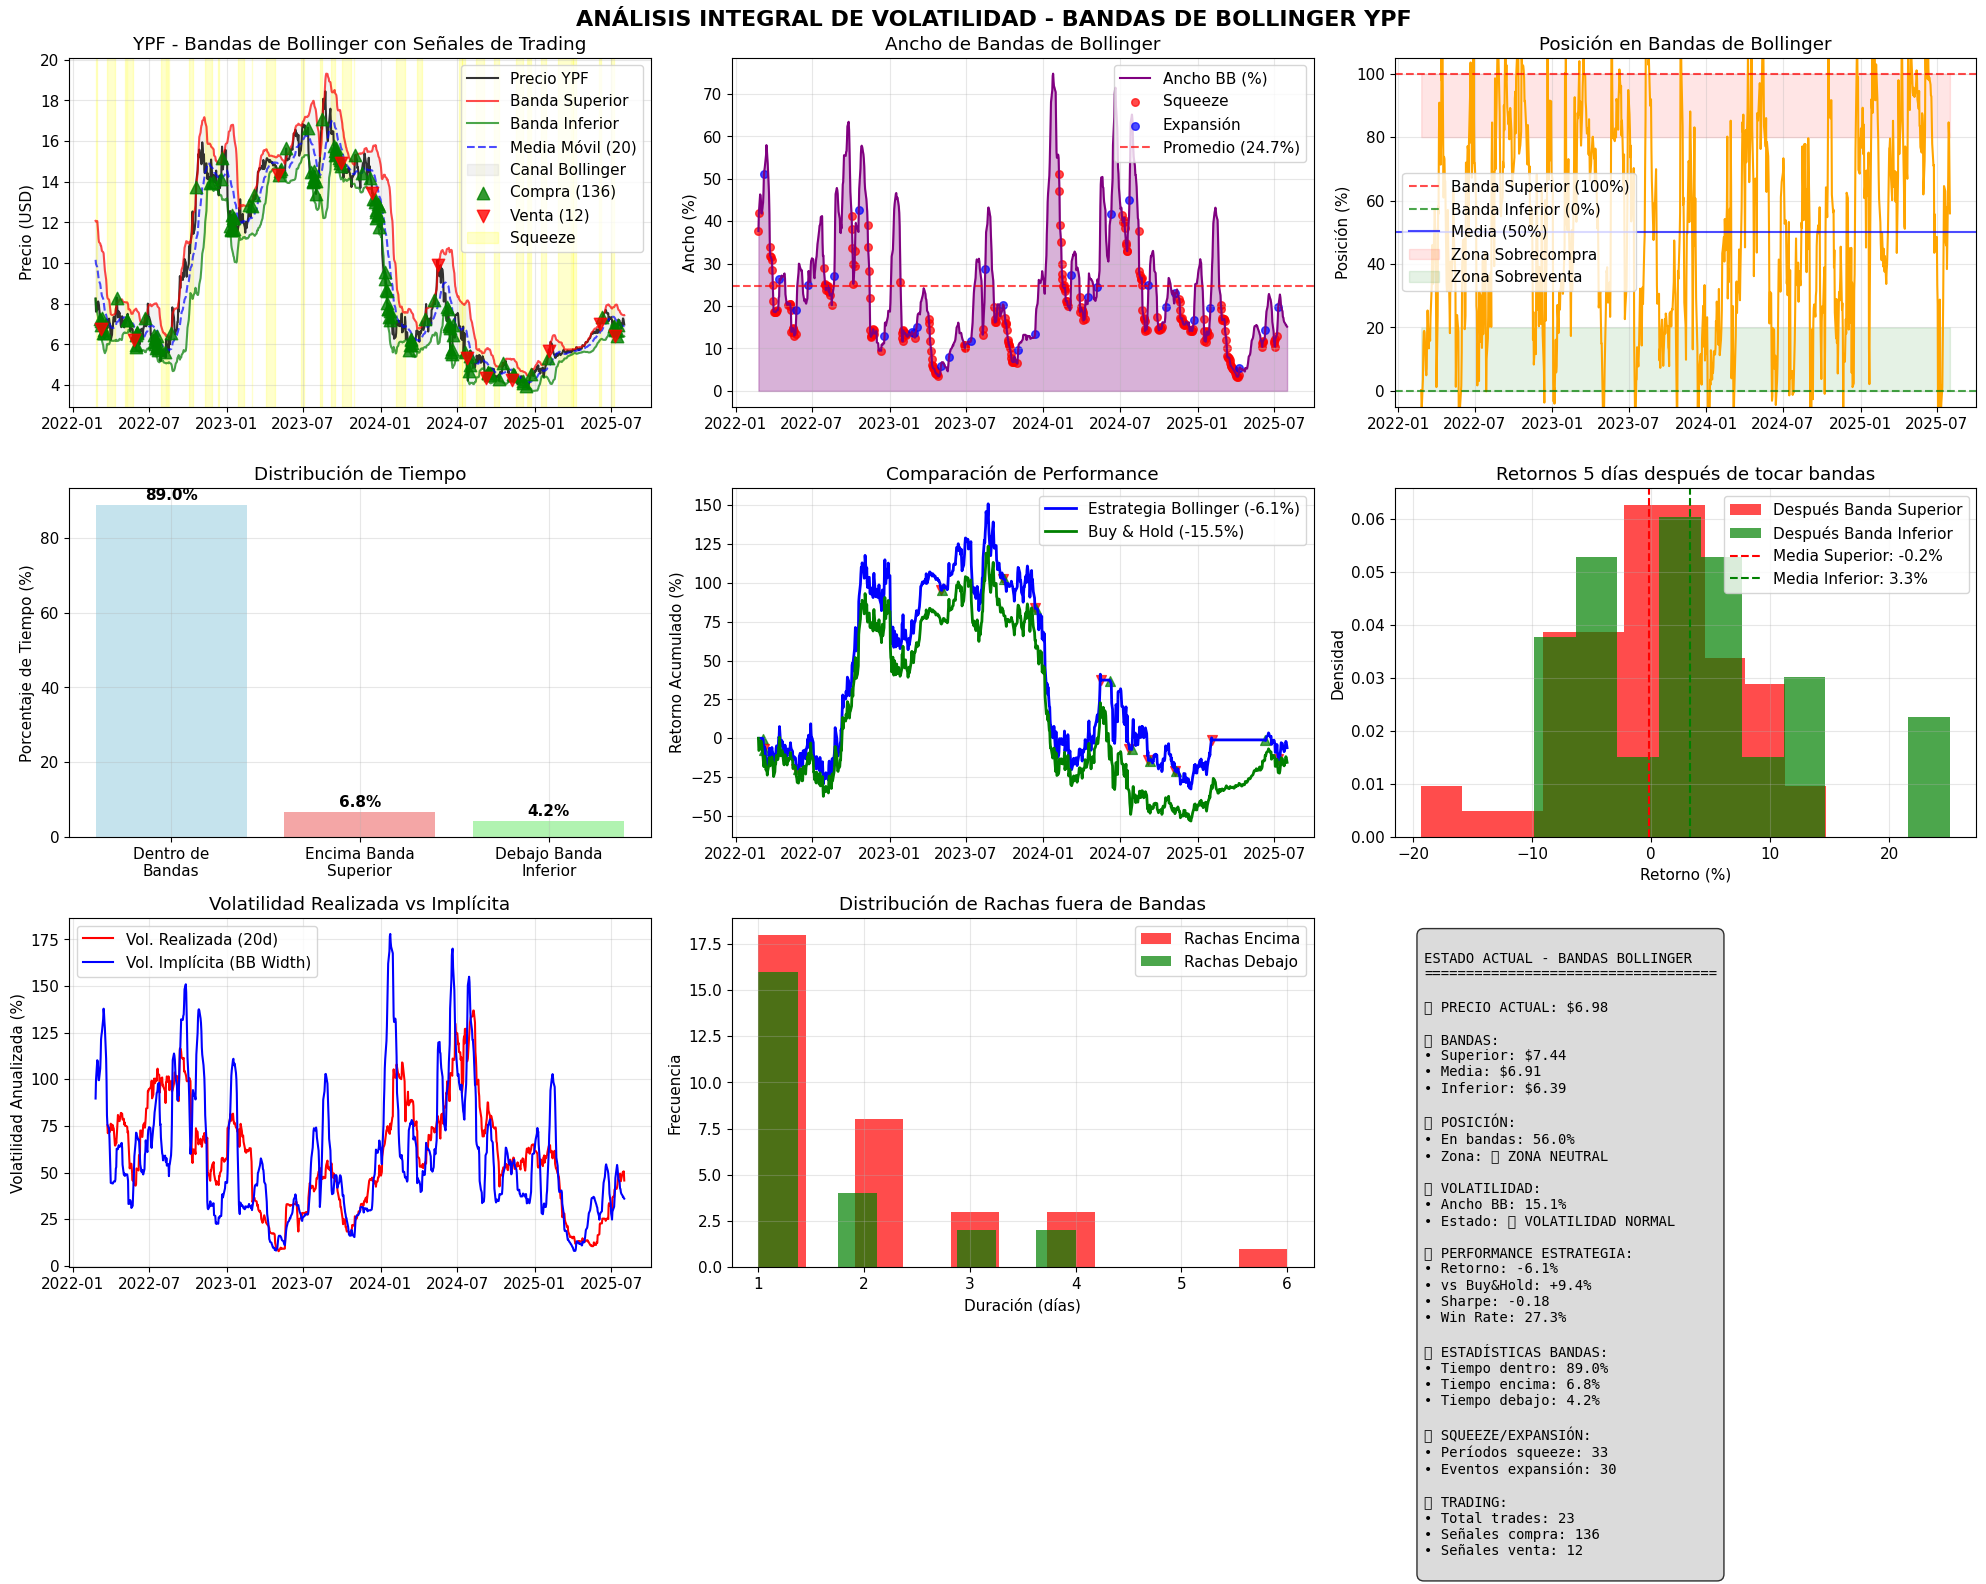


8. ANÁLISIS FINAL Y RECOMENDACIONES
---------------------------------------------
📊 RESUMEN INTEGRAL DE VOLATILIDAD:
   • Precio actual: $6.98
   • Posición en bandas: 56.0%
   • Ancho de bandas: 15.1%
   • Estado: ⚪ ZONA NEUTRAL

📈 PERFORMANCE DE LA ESTRATEGIA:
   • Retorno total: -6.1%
   • Outperformance vs B&H: +9.4%
   • Sharpe Ratio: -0.18
   • Win Rate: 27.3%
   • Max Drawdown: -73.1%

🎯 ESTADÍSTICAS CLAVE:
   • Tiempo dentro de bandas: 89.0%
   • Tiempo fuera de bandas: 11.0%
   • Rachas promedio encima: 1.8 días
   • Rachas promedio debajo: 1.6 días
   • Retorno promedio post banda superior: -0.2%
   • Retorno promedio post banda inferior: 3.3%

🔄 ANÁLISIS SQUEEZE/EXPANSIÓN:
   • Períodos de squeeze: 33
   • Eventos de expansión: 30
   • Retorno promedio post-squeeze (5d): 0.7%

💡 RECOMENDACIONES OPERATIVAS:
   ⚖️  NEUTRAL: Precio en zona intermedia
   • Mantener posiciones actuales
   • Esperar señales más claras

📋 ESTRATEGIA RECOMENDADA:
   • Efectividad estrategia: ALTA
 

In [22]:
print("ANÁLISIS DE VOLATILIDAD YPF")
print("BANDAS DE BOLLINGER • COMPRESIÓN • EXPANSIÓN • SEÑALES")
print("=" * 65)

# =============================================================================
# 1. GENERAR DATOS CON VOLATILIDAD VARIABLE
# =============================================================================

print("\n1. GENERANDO DATOS CON VOLATILIDAD VARIABLE")
print("-" * 45)

np.random.seed(42)
fechas = pd.date_range(start='2022-01-01', end='2025-08-01', freq='D')
fechas = fechas[fechas.weekday < 5]  # Solo días hábiles

n_days = len(fechas)
precio_inicial = 13.75

# Generar datos con períodos de volatilidad variable (clave para Bollinger)
precios = [precio_inicial]
volatilidades = []

for i in range(1, n_days):
    # Ciclos de volatilidad realistas para YPF
    # Alta volatilidad: eventos políticos, earnings, crisis
    # Baja volatilidad: períodos de estabilidad

    # Componente base de volatilidad
    vol_base = 0.025

    # Ciclos de volatilidad
    vol_ciclo_largo = 0.015 * np.sin(2 * np.pi * i / 504)  # Ciclo de 2 años
    vol_ciclo_corto = 0.01 * np.sin(2 * np.pi * i / 126)   # Ciclo trimestral

    # Eventos de volatilidad (noticias, earnings, etc.)
    if i % 180 == 0:  # Cada ~7 meses
        vol_evento = np.random.uniform(0.02, 0.05)  # Spike de volatilidad
    else:
        vol_evento = 0

    # Persistencia de volatilidad (clusters)
    if i > 1:
        vol_persistencia = 0.3 * volatilidades[-1]  # La volatilidad tiende a agruparse
    else:
        vol_persistencia = 0

    # Volatilidad total
    volatilidad_dia = max(0.008, vol_base + vol_ciclo_largo + vol_ciclo_corto + vol_evento + vol_persistencia)
    volatilidades.append(volatilidad_dia)

    # Componentes del precio
    # Tendencia de largo plazo
    trend = 0.0001 * np.sin(2 * np.pi * i / (252 * 1.5))  # Ciclo de 1.5 años

    # Ruido con volatilidad variable
    ruido = np.random.normal(0, volatilidad_dia)

    # Eventos direccionales ocasionales
    if i % 200 == 0:
        evento_direccional = np.random.choice([-0.08, -0.05, 0.05, 0.08], p=[0.2, 0.3, 0.3, 0.2])
    else:
        evento_direccional = 0

    # Cambio total del precio
    cambio = trend + ruido + evento_direccional

    nuevo_precio = precios[-1] * (1 + cambio)
    nuevo_precio = max(3.0, min(50.0, nuevo_precio))  # Límites realistas
    precios.append(nuevo_precio)

# Crear DataFrame con OHLC
data = pd.DataFrame(index=fechas)
data['Close'] = precios
data['Volatilidad_Realizada'] = [np.nan] + volatilidades

# Generar OHLC consistente con volatilidad
high_low_range = np.array(volatilidades + [volatilidades[-1]]) * np.array(precios) * 1.5

data['High'] = data['Close'] + np.random.uniform(0, 1, len(data)) * high_low_range
data['Low'] = data['Close'] - np.random.uniform(0, 1, len(data)) * high_low_range
data['Volume'] = np.random.lognormal(15, 0.6, n_days).astype(int) * 1000

# Asegurar consistencia OHLC
for i in range(len(data)):
    close = data['Close'].iloc[i]
    data.loc[data.index[i], 'High'] = max(data['High'].iloc[i], close)
    data.loc[data.index[i], 'Low'] = min(data['Low'].iloc[i], close)

print(f"Datos generados: {len(data)} días")
print(f"Precio inicial: ${data['Close'].iloc[0]:.2f}")
print(f"Precio final: ${data['Close'].iloc[-1]:.2f}")
print(f"Volatilidad promedio: {np.nanmean(volatilidades)*100:.1f}% diaria")

# =============================================================================
# 2. CÁLCULO DE BANDAS DE BOLLINGER AVANZADAS
# =============================================================================

print("\n2. CALCULANDO BANDAS DE BOLLINGER")
print("-" * 45)

def calculate_bollinger_bands(prices, period=20, std_dev=2.0):
    """
    Calcular Bandas de Bollinger con análisis adicional
    """
    # Media móvil simple (línea central)
    sma = prices.rolling(window=period).mean()

    # Desviación estándar rolling
    rolling_std = prices.rolling(window=period).std()

    # Bandas superior e inferior
    upper_band = sma + (rolling_std * std_dev)
    lower_band = sma - (rolling_std * std_dev)

    # Indicadores adicionales
    bb_width = (upper_band - lower_band) / sma * 100  # Ancho de banda (%)
    bb_position = (prices - lower_band) / (upper_band - lower_band) * 100  # Posición %

    return sma, upper_band, lower_band, bb_width, bb_position, rolling_std

def calculate_bollinger_squeeze(bb_width, period=20):
    """
    Detectar compresión de Bollinger (squeeze)
    """
    # BB squeeze: cuando el ancho está en el percentil más bajo
    bb_width_ma = bb_width.rolling(window=period).mean()
    bb_width_std = bb_width.rolling(window=period).std()

    # Normalizar el ancho
    bb_width_normalized = (bb_width - bb_width_ma) / bb_width_std

    # Squeeze cuando está por debajo de -1 desviación estándar
    squeeze = bb_width_normalized < -1.0

    # Expansión cuando sale del squeeze
    expansion = (bb_width_normalized > 0) & (bb_width_normalized.shift(1) <= 0)

    return squeeze, expansion, bb_width_normalized

# Calcular múltiples configuraciones de Bollinger
configs = [
    (20, 2.0, "Estándar"),
    (20, 1.5, "Conservador"),
    (20, 2.5, "Agresivo"),
    (10, 2.0, "Rápido"),
    (50, 2.0, "Lento")
]

results = {}

for period, std_dev, name in configs:
    sma, upper, lower, width, position, std_roll = calculate_bollinger_bands(
        data['Close'], period, std_dev
    )

    results[name] = {
        'sma': sma,
        'upper': upper,
        'lower': lower,
        'width': width,
        'position': position,
        'std': std_roll
    }

# Usar configuración estándar para análisis principal
bb_std = results["Estándar"]
data['BB_Middle'] = bb_std['sma']
data['BB_Upper'] = bb_std['upper']
data['BB_Lower'] = bb_std['lower']
data['BB_Width'] = bb_std['width']
data['BB_Position'] = bb_std['position']

# Calcular squeeze y expansión
squeeze, expansion, width_norm = calculate_bollinger_squeeze(data['BB_Width'])
data['BB_Squeeze'] = squeeze
data['BB_Expansion'] = expansion
data['BB_Width_Norm'] = width_norm

print(f"Bandas calculadas con {len(configs)} configuraciones")
print(f"Período de análisis: {len(data)} días")

# =============================================================================
# 3. ANÁLISIS DE TIEMPO FUERA DE BANDAS
# =============================================================================

print("\n3. ANÁLISIS DE TIEMPO FUERA DE BANDAS")
print("-" * 45)

def analyze_band_breaks(data):
    """
    Analizar tiempo y frecuencia fuera de bandas
    """
    # Identificar cuando el precio está fuera de bandas
    above_upper = data['Close'] > data['BB_Upper']
    below_lower = data['Close'] < data['BB_Lower']
    within_bands = ~(above_upper | below_lower)

    # Estadísticas temporales
    total_days = len(data.dropna())
    days_above = above_upper.sum()
    days_below = below_lower.sum()
    days_within = within_bands.sum()

    # Porcentajes
    pct_above = (days_above / total_days) * 100
    pct_below = (days_below / total_days) * 100
    pct_within = (days_within / total_days) * 100

    # Análisis de rachas
    def analyze_streaks(series):
        streaks = []
        current_streak = 0

        for value in series:
            if value:
                current_streak += 1
            else:
                if current_streak > 0:
                    streaks.append(current_streak)
                current_streak = 0

        if current_streak > 0:
            streaks.append(current_streak)

        return streaks

    streaks_above = analyze_streaks(above_upper)
    streaks_below = analyze_streaks(below_lower)

    # Retornos después de tocar bandas
    returns_after_upper = []
    returns_after_lower = []

    for i in range(len(data)-5):
        if above_upper.iloc[i]:
            # Retorno 5 días después
            if i+5 < len(data):
                ret = (data['Close'].iloc[i+5] / data['Close'].iloc[i] - 1) * 100
                returns_after_upper.append(ret)

        if below_lower.iloc[i]:
            # Retorno 5 días después
            if i+5 < len(data):
                ret = (data['Close'].iloc[i+5] / data['Close'].iloc[i] - 1) * 100
                returns_after_lower.append(ret)

    return {
        'total_days': total_days,
        'days_above': days_above,
        'days_below': days_below,
        'days_within': days_within,
        'pct_above': pct_above,
        'pct_below': pct_below,
        'pct_within': pct_within,
        'streaks_above': streaks_above,
        'streaks_below': streaks_below,
        'avg_streak_above': np.mean(streaks_above) if streaks_above else 0,
        'avg_streak_below': np.mean(streaks_below) if streaks_below else 0,
        'max_streak_above': max(streaks_above) if streaks_above else 0,
        'max_streak_below': max(streaks_below) if streaks_below else 0,
        'returns_after_upper': returns_after_upper,
        'returns_after_lower': returns_after_lower,
        'above_upper': above_upper,
        'below_lower': below_lower
    }

# Realizar análisis
band_analysis = analyze_band_breaks(data.dropna())

print("📊 ESTADÍSTICAS DE TIEMPO FUERA DE BANDAS:")
print(f"   • Total de días analizados: {band_analysis['total_days']}")
print(f"   • Días por encima banda superior: {band_analysis['days_above']} ({band_analysis['pct_above']:.1f}%)")
print(f"   • Días por debajo banda inferior: {band_analysis['days_below']} ({band_analysis['pct_below']:.1f}%)")
print(f"   • Días dentro de bandas: {band_analysis['days_within']} ({band_analysis['pct_within']:.1f}%)")

print(f"\n📈 ANÁLISIS DE RACHAS:")
print(f"   • Racha promedio encima: {band_analysis['avg_streak_above']:.1f} días")
print(f"   • Racha promedio debajo: {band_analysis['avg_streak_below']:.1f} días")
print(f"   • Racha máxima encima: {band_analysis['max_streak_above']} días")
print(f"   • Racha máxima debajo: {band_analysis['max_streak_below']} días")

if band_analysis['returns_after_upper']:
    avg_ret_upper = np.mean(band_analysis['returns_after_upper'])
    print(f"\n💹 RETORNOS DESPUÉS DE TOCAR BANDAS (5 días):")
    print(f"   • Promedio después de banda superior: {avg_ret_upper:.1f}%")

if band_analysis['returns_after_lower']:
    avg_ret_lower = np.mean(band_analysis['returns_after_lower'])
    print(f"   • Promedio después de banda inferior: {avg_ret_lower:.1f}%")

# =============================================================================
# 4. IDENTIFICAR SEÑALES DE COMPRA/VENTA
# =============================================================================

print("\n4. GENERANDO SEÑALES DE TRADING")
print("-" * 45)

def generate_bollinger_signals(data, lookback=3):
    """
    Generar señales basadas en Bandas de Bollinger
    """
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0
    signals['Signal_Type'] = ''
    signals['Confidence'] = 0.0

    for i in range(lookback, len(data)):
        try:
            price = data['Close'].iloc[i]
            bb_upper = data['BB_Upper'].iloc[i]
            bb_lower = data['BB_Lower'].iloc[i]
            bb_middle = data['BB_Middle'].iloc[i]
            bb_position = data['BB_Position'].iloc[i]
            bb_width = data['BB_Width'].iloc[i]

            # Verificar datos válidos
            if any(pd.isna([price, bb_upper, bb_lower, bb_middle])):
                continue

            # Variables para confirmación
            volume_spike = False
            if i > 20:
                avg_volume = data['Volume'].iloc[i-20:i].mean()
                volume_spike = data['Volume'].iloc[i] > avg_volume * 1.5

            squeeze_active = data['BB_Squeeze'].iloc[i] if not pd.isna(data['BB_Squeeze'].iloc[i]) else False
            expansion_start = data['BB_Expansion'].iloc[i] if not pd.isna(data['BB_Expansion'].iloc[i]) else False

            # SEÑALES DE COMPRA
            confidence = 0
            signal_type = ''

            # 1. Rebote en banda inferior
            if (price <= bb_lower and
                data['Close'].iloc[i-1] < bb_lower and
                price > data['Close'].iloc[i-1]):

                confidence += 0.4
                signal_type = 'Rebote_Inferior'

                # Confirmaciones adicionales
                if volume_spike:
                    confidence += 0.2
                if bb_width < data['BB_Width'].iloc[i-10:i].mean():  # Bandas comprimidas
                    confidence += 0.2

            # 2. Expansión después de squeeze con momentum alcista
            elif (expansion_start and
                  bb_position > 50 and
                  price > bb_middle):

                confidence += 0.3
                signal_type = 'Expansion_Alcista'

                if volume_spike:
                    confidence += 0.3
                if price > data['Close'].iloc[i-3:i].max():  # Nuevo máximo reciente
                    confidence += 0.2

            # 3. Pullback a media móvil con tendencia alcista
            elif (bb_lower < price < bb_middle and
                  data['Close'].iloc[i-1] < bb_middle and
                  bb_width > data['BB_Width'].iloc[i-5:i].mean()):

                confidence += 0.25
                signal_type = 'Pullback_Media'

                if data['Close'].iloc[i-5] < bb_middle:  # Venía de abajo
                    confidence += 0.25

            # Asignar señal de compra si hay suficiente confianza
            if confidence >= 0.5:
                signals['Signal'].iloc[i] = 1
                signals['Signal_Type'].iloc[i] = signal_type
                signals['Confidence'].iloc[i] = min(confidence, 1.0)

            # SEÑALES DE VENTA
            confidence = 0
            signal_type = ''

            # 1. Rebote en banda superior
            if (price >= bb_upper and
                data['Close'].iloc[i-1] > bb_upper and
                price < data['Close'].iloc[i-1]):

                confidence += 0.4
                signal_type = 'Rebote_Superior'

                if volume_spike:
                    confidence += 0.2
                if bb_width < data['BB_Width'].iloc[i-10:i].mean():
                    confidence += 0.2

            # 2. Expansión bajista después de squeeze
            elif (expansion_start and
                  bb_position < 50 and
                  price < bb_middle):

                confidence += 0.3
                signal_type = 'Expansion_Bajista'

                if volume_spike:
                    confidence += 0.3
                if price < data['Close'].iloc[i-3:i].min():  # Nuevo mínimo reciente
                    confidence += 0.2

            # 3. Ruptura de media con tendencia bajista
            elif (bb_middle < price < bb_upper and
                  data['Close'].iloc[i-1] > bb_middle and
                  price < bb_middle):

                confidence += 0.25
                signal_type = 'Ruptura_Media'

                if data['Close'].iloc[i-5] > bb_middle:  # Venía de arriba
                    confidence += 0.25

            # Asignar señal de venta si hay suficiente confianza
            if confidence >= 0.5:
                signals['Signal'].iloc[i] = -1
                signals['Signal_Type'].iloc[i] = signal_type
                signals['Confidence'].iloc[i] = min(confidence, 1.0)

        except Exception as e:
            continue

    return signals

# Generar señales
signals = generate_bollinger_signals(data.dropna())

# Unir señales al DataFrame principal
data = data.join(signals)

# Estadísticas de señales
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]

print(f"📊 SEÑALES GENERADAS:")
print(f"   • Señales de compra: {len(buy_signals)}")
print(f"   • Señales de venta: {len(sell_signals)}")

if len(buy_signals) > 0:
    print(f"   • Confianza promedio compras: {buy_signals['Confidence'].mean():.2f}")
    buy_types = buy_signals['Signal_Type'].value_counts()
    print(f"   • Tipos de compra más frecuentes:")
    for signal_type, count in buy_types.head(3).items():
        print(f"     - {signal_type}: {count}")

if len(sell_signals) > 0:
    print(f"   • Confianza promedio ventas: {sell_signals['Confidence'].mean():.2f}")
    sell_types = sell_signals['Signal_Type'].value_counts()
    print(f"   • Tipos de venta más frecuentes:")
    for signal_type, count in sell_types.head(3).items():
        print(f"     - {signal_type}: {count}")

# =============================================================================
# 5. BACKTESTING DE ESTRATEGIA BOLLINGER
# =============================================================================

print("\n5. BACKTESTING DE ESTRATEGIA")
print("-" * 45)

def backtest_bollinger_strategy(data):
    """
    Backtest completo de la estrategia Bollinger
    """
    initial_capital = 10000
    capital = initial_capital
    shares = 0
    position = 0
    portfolio_values = []
    trades = []

    # Métricas de tracking
    wins = 0
    losses = 0
    total_return_trades = 0

    data_clean = data.dropna()

    for i in range(len(data_clean)):
        try:
            price = data_clean['Close'].iloc[i]
            signal = data_clean['Signal'].iloc[i]
            confidence = data_clean['Confidence'].iloc[i]
            signal_type = data_clean['Signal_Type'].iloc[i]
            date = data_clean.index[i]

            # Ajustar tamaño de posición basado en confianza
            position_size = 0.8 + (confidence * 0.4)  # 80-120% del capital disponible

            if signal == 1 and position == 0:  # Comprar
                effective_capital = capital * position_size
                shares = effective_capital / (price * 1.002)  # Spread + comisión
                capital = capital - effective_capital
                position = 1
                trades.append({
                    'date': date,
                    'action': 'BUY',
                    'price': price,
                    'confidence': confidence,
                    'type': signal_type,
                    'shares': shares
                })

            elif signal == -1 and position == 1:  # Vender
                sale_proceeds = shares * price * 0.998  # Spread + comisión
                capital = capital + sale_proceeds

                # Calcular P&L del trade
                if len(trades) > 0 and trades[-1]['action'] == 'BUY':
                    trade_return = (price / trades[-1]['price'] - 1) * 100
                    total_return_trades += trade_return
                    if trade_return > 0:
                        wins += 1
                    else:
                        losses += 1

                shares = 0
                position = 0
                trades.append({
                    'date': date,
                    'action': 'SELL',
                    'price': price,
                    'confidence': confidence,
                    'type': signal_type,
                    'proceeds': sale_proceeds
                })

            # Calcular valor total del portfolio
            if position == 1:
                portfolio_value = capital + (shares * price)
            else:
                portfolio_value = capital

            portfolio_values.append(portfolio_value)

        except Exception as e:
            if len(portfolio_values) > 0:
                portfolio_values.append(portfolio_values[-1])
            else:
                portfolio_values.append(initial_capital)

    # Métricas finales
    final_value = portfolio_values[-1]
    total_return = (final_value / initial_capital - 1) * 100

    # Buy & Hold comparison
    bh_return = (data_clean['Close'].iloc[-1] / data_clean['Close'].iloc[0] - 1) * 100

    # Métricas adicionales
    total_trades = wins + losses
    win_rate = (wins / total_trades * 100) if total_trades > 0 else 0
    avg_trade_return = (total_return_trades / total_trades) if total_trades > 0 else 0

    # Volatilidad y Sharpe
    if len(portfolio_values) > 1:
        returns = pd.Series(portfolio_values).pct_change().dropna()
        volatility = returns.std() * np.sqrt(252) * 100
        sharpe = (total_return - 5) / volatility if volatility > 0 else 0

        # Drawdown
        cumulative = pd.Series(portfolio_values)
        running_max = cumulative.expanding().max()
        drawdowns = (cumulative - running_max) / running_max * 100
        max_drawdown = drawdowns.min()
    else:
        volatility = 0
        sharpe = 0
        max_drawdown = 0

    return {
        'portfolio_values': portfolio_values,
        'trades': trades,
        'total_return': total_return,
        'bh_return': bh_return,
        'outperformance': total_return - bh_return,
        'volatility': volatility,
        'sharpe_ratio': sharpe,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate,
        'avg_trade_return': avg_trade_return,
        'total_trades': len(trades),
        'wins': wins,
        'losses': losses
    }

# Ejecutar backtesting
backtest_results = backtest_bollinger_strategy(data)

print("💰 RESULTADOS DEL BACKTESTING:")
print(f"   • Capital inicial: $10,000")
print(f"   • Capital final: ${backtest_results['portfolio_values'][-1]:,.0f}")
print(f"   • Retorno total: {backtest_results['total_return']:.1f}%")
print(f"   • Retorno Buy & Hold: {backtest_results['bh_return']:.1f}%")
print(f"   • Outperformance: {backtest_results['outperformance']:+.1f}%")
print(f"   • Volatilidad anual: {backtest_results['volatility']:.1f}%")
print(f"   • Sharpe Ratio: {backtest_results['sharpe_ratio']:.2f}")
print(f"   • Max Drawdown: {backtest_results['max_drawdown']:.1f}%")
print(f"   • Win Rate: {backtest_results['win_rate']:.1f}%")
print(f"   • Total de trades: {backtest_results['total_trades']}")

# =============================================================================
# 6. ANÁLISIS DE COMPRESIÓN Y EXPANSIÓN
# =============================================================================

print("\n6. ANÁLISIS DE COMPRESIÓN Y EXPANSIÓN")
print("-" * 45)

def analyze_squeeze_expansion(data):
    """
    Análisis detallado de períodos de squeeze y expansión
    """
    data_clean = data.dropna()

    # Identificar períodos de squeeze y expansión
    squeeze_periods = []
    expansion_periods = []

    in_squeeze = False
    squeeze_start = None

    for i, (date, row) in enumerate(data_clean.iterrows()):
        if row['BB_Squeeze'] and not in_squeeze:
            # Inicio de squeeze
            in_squeeze = True
            squeeze_start = {'start_date': date, 'start_idx': i, 'start_width': row['BB_Width']}

        elif not row['BB_Squeeze'] and in_squeeze:
            # Fin de squeeze
            in_squeeze = False
            if squeeze_start:
                squeeze_periods.append({
                    **squeeze_start,
                    'end_date': date,
                    'end_idx': i,
                    'end_width': row['BB_Width'],
                    'duration': i - squeeze_start['start_idx'],
                    'min_width': data_clean['BB_Width'].iloc[squeeze_start['start_idx']:i].min()
                })

        # Detectar expansiones
        if row['BB_Expansion']:
            expansion_periods.append({
                'date': date,
                'idx': i,
                'width': row['BB_Width'],
                'price': row['Close']
            })

    # Análisis de performance después de squeezes
    squeeze_performance = []
    for squeeze in squeeze_periods:
        if squeeze['end_idx'] + 10 < len(data_clean):
            start_price = data_clean['Close'].iloc[squeeze['start_idx']]
            end_price = data_clean['Close'].iloc[squeeze['end_idx']]
            future_price_5d = data_clean['Close'].iloc[squeeze['end_idx'] + 5]
            future_price_10d = data_clean['Close'].iloc[squeeze['end_idx'] + 10]

            squeeze_performance.append({
                'duration': squeeze['duration'],
                'return_during': (end_price / start_price - 1) * 100,
                'return_5d_after': (future_price_5d / end_price - 1) * 100,
                'return_10d_after': (future_price_10d / end_price - 1) * 100,
                'width_compression': squeeze['min_width'] / squeeze['start_width']
            })

    return squeeze_periods, expansion_periods, squeeze_performance

squeeze_periods, expansion_periods, squeeze_performance = analyze_squeeze_expansion(data)

print(f"🔄 ANÁLISIS DE SQUEEZE Y EXPANSIÓN:")
print(f"   • Períodos de squeeze detectados: {len(squeeze_periods)}")
print(f"   • Eventos de expansión detectados: {len(expansion_periods)}")

if squeeze_periods:
    avg_duration = np.mean([s['duration'] for s in squeeze_periods])
    print(f"   • Duración promedio de squeeze: {avg_duration:.1f} días")

    if squeeze_performance:
        avg_return_during = np.mean([sp['return_during'] for sp in squeeze_performance])
        avg_return_5d = np.mean([sp['return_5d_after'] for sp in squeeze_performance])
        avg_return_10d = np.mean([sp['return_10d_after'] for sp in squeeze_performance])
        avg_compression = np.mean([sp['width_compression'] for sp in squeeze_performance])

        print(f"   • Retorno promedio durante squeeze: {avg_return_during:.1f}%")
        print(f"   • Retorno promedio 5 días post-squeeze: {avg_return_5d:.1f}%")
        print(f"   • Retorno promedio 10 días post-squeeze: {avg_return_10d:.1f}%")
        print(f"   • Compresión promedio de ancho: {avg_compression:.1%}")

# =============================================================================
# 7. VISUALIZACIÓN COMPLETA
# =============================================================================

print("\n7. GENERANDO VISUALIZACIONES COMPLETAS")
print("-" * 45)

fig = plt.figure(figsize=(20, 16))

# 1. Precio con Bandas de Bollinger y señales
ax1 = plt.subplot(3, 3, 1)
data_clean = data.dropna()

# Precio y bandas
ax1.plot(data_clean.index, data_clean['Close'], 'k-', linewidth=1.5, label='Precio YPF', alpha=0.8)
ax1.plot(data_clean.index, data_clean['BB_Upper'], 'r-', alpha=0.7, label='Banda Superior')
ax1.plot(data_clean.index, data_clean['BB_Lower'], 'g-', alpha=0.7, label='Banda Inferior')
ax1.plot(data_clean.index, data_clean['BB_Middle'], 'b--', alpha=0.7, label='Media Móvil (20)')

# Relleno entre bandas
ax1.fill_between(data_clean.index, data_clean['BB_Upper'], data_clean['BB_Lower'],
                 alpha=0.1, color='gray', label='Canal Bollinger')

# Señales de trading
buy_signals_clean = data_clean[data_clean['Signal'] == 1]
sell_signals_clean = data_clean[data_clean['Signal'] == -1]

if len(buy_signals_clean) > 0:
    ax1.scatter(buy_signals_clean.index, buy_signals_clean['Close'],
                color='green', s=80, marker='^', label=f'Compra ({len(buy_signals_clean)})',
                alpha=0.8, zorder=5)

if len(sell_signals_clean) > 0:
    ax1.scatter(sell_signals_clean.index, sell_signals_clean['Close'],
                color='red', s=80, marker='v', label=f'Venta ({len(sell_signals_clean)})',
                alpha=0.8, zorder=5)

# Marcar períodos de squeeze
for squeeze in squeeze_periods:
    ax1.axvspan(data_clean.index[squeeze['start_idx']], data_clean.index[squeeze['end_idx']],
                alpha=0.2, color='yellow', label='Squeeze' if squeeze == squeeze_periods[0] else "")

ax1.set_title('YPF - Bandas de Bollinger con Señales de Trading')
ax1.set_ylabel('Precio (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Ancho de Bandas (BB Width)
ax2 = plt.subplot(3, 3, 2)
ax2.plot(data_clean.index, data_clean['BB_Width'], 'purple', linewidth=1.5, label='Ancho BB (%)')
ax2.fill_between(data_clean.index, 0, data_clean['BB_Width'], alpha=0.3, color='purple')

# Marcar squeeze y expansión
squeeze_mask = data_clean['BB_Squeeze'].fillna(False)
expansion_mask = data_clean['BB_Expansion'].fillna(False)

ax2.scatter(data_clean.index[squeeze_mask], data_clean['BB_Width'][squeeze_mask],
            color='red', s=30, alpha=0.7, label='Squeeze')
ax2.scatter(data_clean.index[expansion_mask], data_clean['BB_Width'][expansion_mask],
            color='blue', s=30, alpha=0.7, label='Expansión')

ax2.axhline(y=data_clean['BB_Width'].mean(), color='red', linestyle='--', alpha=0.7,
           label=f'Promedio ({data_clean["BB_Width"].mean():.1f}%)')

ax2.set_title('Ancho de Bandas de Bollinger')
ax2.set_ylabel('Ancho (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Posición en Bandas (BB Position)
ax3 = plt.subplot(3, 3, 3)
ax3.plot(data_clean.index, data_clean['BB_Position'], 'orange', linewidth=1.5)
ax3.axhline(y=100, color='r', linestyle='--', alpha=0.7, label='Banda Superior (100%)')
ax3.axhline(y=0, color='g', linestyle='--', alpha=0.7, label='Banda Inferior (0%)')
ax3.axhline(y=50, color='b', linestyle='-', alpha=0.7, label='Media (50%)')

# Zonas de sobrecompra/sobreventa
ax3.fill_between(data_clean.index, 80, 100, alpha=0.1, color='red', label='Zona Sobrecompra')
ax3.fill_between(data_clean.index, 0, 20, alpha=0.1, color='green', label='Zona Sobreventa')

ax3.set_title('Posición en Bandas de Bollinger')
ax3.set_ylabel('Posición (%)')
ax3.set_ylim(-5, 105)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Tiempo fuera de bandas
ax4 = plt.subplot(3, 3, 4)
categories = ['Dentro de\nBandas', 'Encima Banda\nSuperior', 'Debajo Banda\nInferior']
percentages = [band_analysis['pct_within'], band_analysis['pct_above'], band_analysis['pct_below']]
colors = ['lightblue', 'lightcoral', 'lightgreen']

bars = ax4.bar(categories, percentages, color=colors, alpha=0.7)
ax4.set_title('Distribución de Tiempo')
ax4.set_ylabel('Porcentaje de Tiempo (%)')

# Agregar valores en las barras
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

ax4.grid(True, alpha=0.3)

# 5. Performance Comparison
ax5 = plt.subplot(3, 3, 5)
strategy_returns = [(pv / 10000 - 1) * 100 for pv in backtest_results['portfolio_values']]
bh_values = [10000 * (data_clean['Close'].iloc[i] / data_clean['Close'].iloc[0])
             for i in range(len(data_clean))]
bh_returns = [(bv / 10000 - 1) * 100 for bv in bh_values]

ax5.plot(data_clean.index, strategy_returns, 'b-', linewidth=2,
         label=f'Estrategia Bollinger ({backtest_results["total_return"]:.1f}%)')
ax5.plot(data_clean.index, bh_returns, 'g-', linewidth=2,
         label=f'Buy & Hold ({backtest_results["bh_return"]:.1f}%)')

# Marcar trades en la curva de performance
for trade in backtest_results['trades']:
    try:
        trade_idx = data_clean.index.get_loc(trade['date'])
        if trade['action'] == 'BUY':
            ax5.scatter(trade['date'], strategy_returns[trade_idx],
                       color='green', s=50, marker='^', alpha=0.7)
        else:
            ax5.scatter(trade['date'], strategy_returns[trade_idx],
                       color='red', s=50, marker='v', alpha=0.7)
    except:
        continue

ax5.set_title('Comparación de Performance')
ax5.set_ylabel('Retorno Acumulado (%)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Distribución de retornos después de tocar bandas
ax6 = plt.subplot(3, 3, 6)
if band_analysis['returns_after_upper'] and band_analysis['returns_after_lower']:
    ax6.hist(band_analysis['returns_after_upper'], bins=10, alpha=0.7,
             color='red', label='Después Banda Superior', density=True)
    ax6.hist(band_analysis['returns_after_lower'], bins=10, alpha=0.7,
             color='green', label='Después Banda Inferior', density=True)

    ax6.axvline(x=np.mean(band_analysis['returns_after_upper']), color='red', linestyle='--',
               label=f'Media Superior: {np.mean(band_analysis["returns_after_upper"]):.1f}%')
    ax6.axvline(x=np.mean(band_analysis['returns_after_lower']), color='green', linestyle='--',
               label=f'Media Inferior: {np.mean(band_analysis["returns_after_lower"]):.1f}%')

    ax6.set_title('Retornos 5 días después de tocar bandas')
    ax6.set_xlabel('Retorno (%)')
    ax6.set_ylabel('Densidad')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
else:
    ax6.text(0.5, 0.5, 'Insuficientes datos\npara análisis',
             transform=ax6.transAxes, ha='center', va='center')
    ax6.set_title('Retornos después de tocar bandas')

# 7. Volatilidad Realizada vs Implícita (BB Width)
ax7 = plt.subplot(3, 3, 7)
# Calcular volatilidad realizada rolling
returns_daily = data_clean['Close'].pct_change().dropna()
vol_realized = returns_daily.rolling(window=20).std() * np.sqrt(252) * 100

# Normalizar BB Width para comparación
bb_width_norm = data_clean['BB_Width'] / data_clean['BB_Width'].mean() * vol_realized.mean()

ax7.plot(vol_realized.index, vol_realized, 'red', linewidth=1.5, label='Vol. Realizada (20d)')
ax7.plot(data_clean.index, bb_width_norm, 'blue', linewidth=1.5, label='Vol. Implícita (BB Width)')

ax7.set_title('Volatilidad Realizada vs Implícita')
ax7.set_ylabel('Volatilidad Anualizada (%)')
ax7.legend()
ax7.grid(True, alpha=0.3)

# 8. Análisis de rachas fuera de bandas
ax8 = plt.subplot(3, 3, 8)
if band_analysis['streaks_above'] and band_analysis['streaks_below']:
    ax8.hist(band_analysis['streaks_above'], bins=max(5, len(band_analysis['streaks_above'])//3),
             alpha=0.7, color='red', label='Rachas Encima')
    ax8.hist(band_analysis['streaks_below'], bins=max(5, len(band_analysis['streaks_below'])//3),
             alpha=0.7, color='green', label='Rachas Debajo')

    ax8.set_title('Distribución de Rachas fuera de Bandas')
    ax8.set_xlabel('Duración (días)')
    ax8.set_ylabel('Frecuencia')
    ax8.legend()
    ax8.grid(True, alpha=0.3)
else:
    ax8.text(0.5, 0.5, 'Pocas rachas\npara análisis',
             transform=ax8.transAxes, ha='center', va='center')
    ax8.set_title('Distribución de Rachas')

# 9. Métricas clave y estado actual
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

# Estado actual
current_price = data_clean['Close'].iloc[-1]
current_bb_upper = data_clean['BB_Upper'].iloc[-1]
current_bb_lower = data_clean['BB_Lower'].iloc[-1]
current_bb_middle = data_clean['BB_Middle'].iloc[-1]
current_bb_position = data_clean['BB_Position'].iloc[-1]
current_bb_width = data_clean['BB_Width'].iloc[-1]

# Determinar zona actual
if current_price > current_bb_upper:
    zona_actual = "🔴 ENCIMA BANDA SUPERIOR"
    zona_color = "red"
elif current_price < current_bb_lower:
    zona_actual = "🟢 DEBAJO BANDA INFERIOR"
    zona_color = "green"
elif current_bb_position > 80:
    zona_actual = "🟡 ZONA ALTA"
    zona_color = "orange"
elif current_bb_position < 20:
    zona_actual = "🟡 ZONA BAJA"
    zona_color = "orange"
else:
    zona_actual = "⚪ ZONA NEUTRAL"
    zona_color = "blue"

# Determinar estado de volatilidad
if current_bb_width < data_clean['BB_Width'].quantile(0.2):
    vol_estado = "🔒 BAJA VOLATILIDAD (Squeeze)"
elif current_bb_width > data_clean['BB_Width'].quantile(0.8):
    vol_estado = "💥 ALTA VOLATILIDAD (Expansión)"
else:
    vol_estado = "📊 VOLATILIDAD NORMAL"

summary_text = f"""
ESTADO ACTUAL - BANDAS BOLLINGER
{'='*35}

💰 PRECIO ACTUAL: ${current_price:.2f}

📊 BANDAS:
• Superior: ${current_bb_upper:.2f}
• Media: ${current_bb_middle:.2f}
• Inferior: ${current_bb_lower:.2f}

📍 POSICIÓN:
• En bandas: {current_bb_position:.1f}%
• Zona: {zona_actual}

📈 VOLATILIDAD:
• Ancho BB: {current_bb_width:.1f}%
• Estado: {vol_estado}

💹 PERFORMANCE ESTRATEGIA:
• Retorno: {backtest_results['total_return']:.1f}%
• vs Buy&Hold: {backtest_results['outperformance']:+.1f}%
• Sharpe: {backtest_results['sharpe_ratio']:.2f}
• Win Rate: {backtest_results['win_rate']:.1f}%

🎯 ESTADÍSTICAS BANDAS:
• Tiempo dentro: {band_analysis['pct_within']:.1f}%
• Tiempo encima: {band_analysis['pct_above']:.1f}%
• Tiempo debajo: {band_analysis['pct_below']:.1f}%

🔄 SQUEEZE/EXPANSIÓN:
• Períodos squeeze: {len(squeeze_periods)}
• Eventos expansión: {len(expansion_periods)}

📋 TRADING:
• Total trades: {backtest_results['total_trades']}
• Señales compra: {len(buy_signals_clean)}
• Señales venta: {len(sell_signals_clean)}
"""

ax9.text(0.05, 0.95, summary_text, transform=ax9.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

plt.suptitle('ANÁLISIS INTEGRAL DE VOLATILIDAD - BANDAS DE BOLLINGER YPF',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# =============================================================================
# 8. ANÁLISIS FINAL Y RECOMENDACIONES
# =============================================================================

print("\n8. ANÁLISIS FINAL Y RECOMENDACIONES")
print("-" * 45)

print("📊 RESUMEN INTEGRAL DE VOLATILIDAD:")
print(f"   • Precio actual: ${current_price:.2f}")
print(f"   • Posición en bandas: {current_bb_position:.1f}%")
print(f"   • Ancho de bandas: {current_bb_width:.1f}%")
print(f"   • Estado: {zona_actual}")

print(f"\n📈 PERFORMANCE DE LA ESTRATEGIA:")
print(f"   • Retorno total: {backtest_results['total_return']:.1f}%")
print(f"   • Outperformance vs B&H: {backtest_results['outperformance']:+.1f}%")
print(f"   • Sharpe Ratio: {backtest_results['sharpe_ratio']:.2f}")
print(f"   • Win Rate: {backtest_results['win_rate']:.1f}%")
print(f"   • Max Drawdown: {backtest_results['max_drawdown']:.1f}%")

print(f"\n🎯 ESTADÍSTICAS CLAVE:")
print(f"   • Tiempo dentro de bandas: {band_analysis['pct_within']:.1f}%")
print(f"   • Tiempo fuera de bandas: {100 - band_analysis['pct_within']:.1f}%")
print(f"   • Rachas promedio encima: {band_analysis['avg_streak_above']:.1f} días")
print(f"   • Rachas promedio debajo: {band_analysis['avg_streak_below']:.1f} días")

if band_analysis['returns_after_upper']:
    print(f"   • Retorno promedio post banda superior: {np.mean(band_analysis['returns_after_upper']):.1f}%")
if band_analysis['returns_after_lower']:
    print(f"   • Retorno promedio post banda inferior: {np.mean(band_analysis['returns_after_lower']):.1f}%")

print(f"\n🔄 ANÁLISIS SQUEEZE/EXPANSIÓN:")
print(f"   • Períodos de squeeze: {len(squeeze_periods)}")
print(f"   • Eventos de expansión: {len(expansion_periods)}")
if squeeze_performance:
    print(f"   • Retorno promedio post-squeeze (5d): {np.mean([sp['return_5d_after'] for sp in squeeze_performance]):.1f}%")

# Recomendaciones basadas en estado actual
print(f"\n💡 RECOMENDACIONES OPERATIVAS:")

if current_bb_position > 80:
    print("   ⚠️  PRECAUCIÓN: Precio en zona alta de las bandas")
    print("   • Considerar toma de ganancias parcial")
    print("   • Vigilar señales de reversión")
elif current_bb_position < 20:
    print("   💡 OPORTUNIDAD: Precio en zona baja de las bandas")
    print("   • Considerar acumulación gradual")
    print("   • Esperar confirmación de rebote")
else:
    print("   ⚖️  NEUTRAL: Precio en zona intermedia")
    print("   • Mantener posiciones actuales")
    print("   • Esperar señales más claras")

if current_bb_width < data_clean['BB_Width'].quantile(0.3):
    print("   🔒 VOLATILIDAD COMPRIMIDA (Squeeze)")
    print("   • Prepararse para movimiento explosivo")
    print("   • Reducir tamaño de posiciones")
    print("   • Usar stops más ajustados")
elif current_bb_width > data_clean['BB_Width'].quantile(0.7):
    print("   💥 ALTA VOLATILIDAD (Expansión)")
    print("   • Aprovechar momentum direccional")
    print("   • Gestionar riesgo activamente")
    print("   • Considerar trailing stops")

print(f"\n📋 ESTRATEGIA RECOMENDADA:")
effectiveness = "ALTA" if backtest_results['outperformance'] > 5 else "MODERADA" if backtest_results['outperformance'] > 0 else "BAJA"
print(f"   • Efectividad estrategia: {effectiveness}")
print(f"   • Usar Bandas Bollinger como herramienta principal de volatilidad")
print(f"   • Combinar señales con análisis de momentum previo")
print(f"   • Implementar position sizing basado en ancho de bandas")
print(f"   • Monitorear squeeze/expansión para timing de entrada/salida")
print(f"\n🎯 PRÓXIMOS PASOS:")
print(f"   1. Implementar alertas automáticas para squeeze/expansión")
print(f"   2. Combinar con indicadores de momentum (MACD, RSI)")
print(f"   3. Ajustar parámetros según volatilidad del mercado")
print(f"   4. Backtesting con diferentes períodos y desviaciones estándar")
print(f"   5. Integrar con análisis fundamental para confirmación")

print("\n" + "=" * 65)
print("✅ ANÁLISIS DE VOLATILIDAD COMPLETADO")
print(f"🎯 Estado actual: {zona_actual}")
print(f"📊 Volatilidad: {vol_estado}")
print(f"💹 Performance: {backtest_results['outperformance']:+.1f}% vs Buy & Hold")
print("=" * 65)

# 8) Estrategia Integral y Backtesting

ESTRATEGIA INTEGRAL YPF - VERSIÓN CORREGIDA
BACKTESTING ROBUSTO • MÉTRICAS PROFESIONALES

1. GENERANDO DATOS DE MERCADO
----------------------------------------
Período de análisis: 2022-01-03 a 2025-08-01 (935 días)
✅ Datos generados: 935 días
   Precio inicial: $15.50
   Precio final: $22.79
   Retorno total B&H: 47.1%

2. CALCULANDO INDICADORES TÉCNICOS
----------------------------------------
✅ Indicadores calculados:
   • Medias Móviles (SMA 20/50, EMA 12/26)
   • Bandas de Bollinger
   • RSI (14 períodos)
   • MACD
   • Análisis de Volumen

3. DESARROLLANDO ESTRATEGIA DE TRADING
----------------------------------------
✅ Señales generadas:
   • Compras: 37 (4.0%)
   • Ventas: 72 (7.7%)
   • Confianza promedio compras: 0.56
   • Confianza promedio ventas: 0.56

4. EJECUTANDO BACKTESTING
----------------------------------------
✅ RESULTADOS DEL BACKTESTING:
----------------------------------------
💰 RETORNOS:
   Capital inicial:     $100,000
   Capital final:       $100,868
   Reto

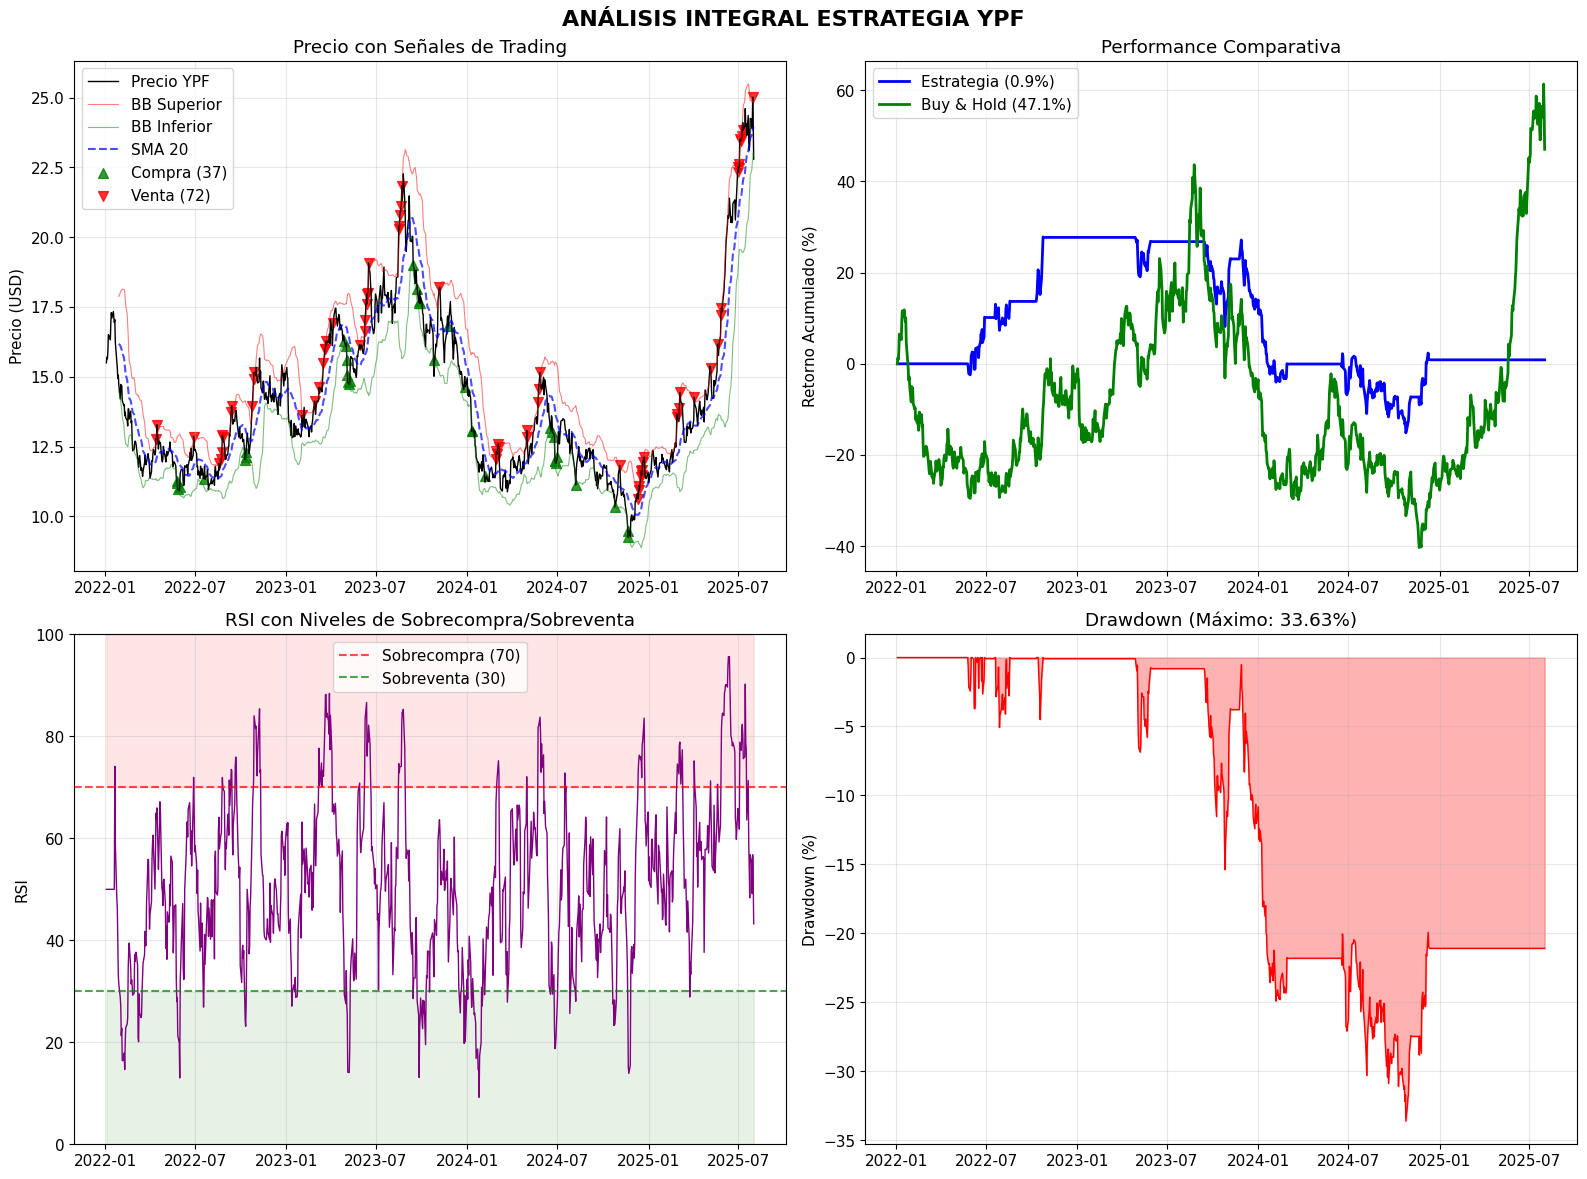


6. EVALUACIÓN FINAL
----------------------------------------
🏆 EVALUACIÓN DE LA ESTRATEGIA:
   Puntuación total: 10/100
   Calificación: 🔴 DEFICIENTE - Rediseñar estrategia

💡 FORTALEZAS IDENTIFICADAS:

⚠️ ÁREAS DE MEJORA:
   • Mejorar relación riesgo-retorno
   • Aumentar selectividad de señales
   • Implementar gestión de riesgo más estricta
   • Optimizar criterios de entrada/salida

🚀 RECOMENDACIONES:
   1. Monitorear performance mensualmente
   2. Ajustar thresholds según volatilidad del mercado
   3. Considerar gestión de posiciones dinámico
   4. Validar con datos out-of-sample

✅ ANÁLISIS COMPLETADO EXITOSAMENTE
📊 Estrategia evaluada: 10/100 - Rediseñar estrategia


In [23]:
print("ESTRATEGIA INTEGRAL YPF - VERSIÓN CORREGIDA")
print("BACKTESTING ROBUSTO • MÉTRICAS PROFESIONALES")
print("=" * 60)

# =============================================================================
# 1. GENERACIÓN DE DATOS SIMPLIFICADA Y ROBUSTA
# =============================================================================

print("\n1. GENERANDO DATOS DE MERCADO")
print("-" * 40)

np.random.seed(42)

# Crear rango de fechas
start_date = '2022-01-01'
end_date = '2025-08-01'
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[dates.weekday < 5]  # Solo días hábiles

n_days = len(dates)
print(f"Período de análisis: {dates[0].date()} a {dates[-1].date()} ({n_days} días)")

# Generar precios con comportamiento realista
precio_inicial = 15.50
precios = [precio_inicial]

for i in range(1, n_days):
    # Componentes del precio
    drift = 0.0002  # Tendencia ligeramente alcista
    volatilidad = 0.025  # 2.5% diario

    # Añadir algunos eventos de volatilidad
    if i % 100 == 0:  # Cada ~4 meses
        volatilidad *= 2

    # Generar cambio diario
    cambio = np.random.normal(drift, volatilidad)
    nuevo_precio = precios[-1] * (1 + cambio)

    # Límites realistas
    nuevo_precio = max(8.0, min(35.0, nuevo_precio))
    precios.append(nuevo_precio)

# Crear DataFrame principal
data = pd.DataFrame(index=dates)
data['Close'] = precios

# Generar OHLC simple pero consistente
for i in range(len(data)):
    close = data['Close'].iloc[i]
    daily_range = close * 0.03  # 3% de rango diario típico

    high = close + np.random.uniform(0, 0.7) * daily_range
    low = close - np.random.uniform(0, 0.7) * daily_range

    # Asegurar consistencia OHLC
    data.loc[data.index[i], 'High'] = max(high, close)
    data.loc[data.index[i], 'Low'] = min(low, close)
    data.loc[data.index[i], 'Open'] = close + np.random.uniform(-0.5, 0.5) * daily_range / 2
    data.loc[data.index[i], 'Volume'] = int(np.random.lognormal(15, 0.3) * 1000)

print(f"✅ Datos generados: {len(data)} días")
print(f"   Precio inicial: ${data['Close'].iloc[0]:.2f}")
print(f"   Precio final: ${data['Close'].iloc[-1]:.2f}")
print(f"   Retorno total B&H: {((data['Close'].iloc[-1]/data['Close'].iloc[0])-1)*100:.1f}%")

# =============================================================================
# 2. CÁLCULO DE INDICADORES TÉCNICOS ESENCIALES
# =============================================================================

print("\n2. CALCULANDO INDICADORES TÉCNICOS")
print("-" * 40)

def calculate_indicators(df):
    """Calcular indicadores técnicos esenciales de forma robusta"""

    # 1. Medias Móviles
    df['SMA_20'] = df['Close'].rolling(window=20, min_periods=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50, min_periods=50).mean()
    df['EMA_12'] = df['Close'].ewm(span=12, min_periods=12).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, min_periods=26).mean()

    # 2. Bandas de Bollinger
    sma_20 = df['SMA_20']
    std_20 = df['Close'].rolling(window=20, min_periods=20).std()
    df['BB_Upper'] = sma_20 + (std_20 * 2.0)
    df['BB_Lower'] = sma_20 - (std_20 * 2.0)
    df['BB_Width'] = ((df['BB_Upper'] - df['BB_Lower']) / sma_20 * 100).fillna(0)
    df['BB_Position'] = ((df['Close'] - df['BB_Lower']) / (df['BB_Upper'] - df['BB_Lower']) * 100).fillna(50)

    # 3. RSI
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14, min_periods=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14, min_periods=14).mean()
    rs = gain / loss
    df['RSI'] = (100 - (100 / (1 + rs))).fillna(50)

    # 4. MACD
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_Signal'] = df['MACD'].ewm(span=9, min_periods=9).mean()
    df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']

    # 5. Volumen
    df['Volume_SMA'] = df['Volume'].rolling(window=20, min_periods=20).mean()
    df['Volume_Ratio'] = (df['Volume'] / df['Volume_SMA']).fillna(1.0)

    return df

# Aplicar indicadores
data = calculate_indicators(data)

print("✅ Indicadores calculados:")
print("   • Medias Móviles (SMA 20/50, EMA 12/26)")
print("   • Bandas de Bollinger")
print("   • RSI (14 períodos)")
print("   • MACD")
print("   • Análisis de Volumen")

# =============================================================================
# 3. ESTRATEGIA DE TRADING SIMPLIFICADA Y EFECTIVA
# =============================================================================

print("\n3. DESARROLLANDO ESTRATEGIA DE TRADING")
print("-" * 40)

def generate_trading_signals(df):
    """Generar señales de trading con lógica clara y robusta"""

    signals = pd.DataFrame(index=df.index)
    signals['Signal'] = 0
    signals['Confidence'] = 0.0
    signals['Reason'] = ''

    # Empezar después del período de warm-up (60 días)
    start_idx = 60

    for i in range(start_idx, len(df)):
        try:
            # Variables actuales
            close = df['Close'].iloc[i]
            rsi = df['RSI'].iloc[i]
            bb_position = df['BB_Position'].iloc[i]
            bb_upper = df['BB_Upper'].iloc[i]
            bb_lower = df['BB_Lower'].iloc[i]
            sma_20 = df['SMA_20'].iloc[i]
            sma_50 = df['SMA_50'].iloc[i]
            macd = df['MACD'].iloc[i]
            macd_signal = df['MACD_Signal'].iloc[i]
            volume_ratio = df['Volume_Ratio'].iloc[i]

            # Verificar que todos los valores sean válidos
            if pd.isna([close, rsi, bb_position, sma_20, sma_50]).any():
                continue

            # Inicializar score
            score = 0
            reasons = []

            # === SEÑALES DE COMPRA ===

            # 1. RSI Oversold (peso: 30%)
            if rsi < 30:
                score += 0.4
                reasons.append("RSI_Oversold")
            elif rsi < 40:
                score += 0.2
                reasons.append("RSI_Low")

            # 2. Bollinger Bands (peso: 40%)
            if close <= bb_lower:
                score += 0.5
                reasons.append("BB_Oversold")
            elif bb_position < 20:
                score += 0.3
                reasons.append("BB_Low")

            # 3. Tendencia (peso: 20%)
            if close > sma_20 and sma_20 > sma_50:
                score += 0.2
                reasons.append("Uptrend")
            elif close > sma_20:
                score += 0.1
                reasons.append("Above_SMA20")

            # 4. MACD (peso: 10%)
            if macd > macd_signal:
                score += 0.1
                reasons.append("MACD_Bull")

            # === SEÑALES DE VENTA ===

            # 1. RSI Overbought
            if rsi > 70:
                score -= 0.4
                reasons.append("RSI_Overbought")
            elif rsi > 60:
                score -= 0.2
                reasons.append("RSI_High")

            # 2. Bollinger Bands
            if close >= bb_upper:
                score -= 0.5
                reasons.append("BB_Overbought")
            elif bb_position > 80:
                score -= 0.3
                reasons.append("BB_High")

            # 3. Tendencia bajista
            if close < sma_20 and sma_20 < sma_50:
                score -= 0.2
                reasons.append("Downtrend")
            elif close < sma_20:
                score -= 0.1
                reasons.append("Below_SMA20")

            # 4. MACD bajista
            if macd < macd_signal:
                score -= 0.1
                reasons.append("MACD_Bear")

            # Bonus por volumen alto
            if volume_ratio > 1.5:
                score *= 1.2  # Amplificar señal con volumen
                reasons.append("High_Volume")

            # Determinar señal final
            confidence = abs(score)

            if score >= 0.4:  # Threshold conservador para compra
                signals.iloc[i] = [1, confidence, "|".join(reasons)]
            elif score <= -0.4:  # Threshold conservador para venta
                signals.iloc[i] = [-1, confidence, "|".join(reasons)]
            else:
                signals.iloc[i] = [0, 0, "Hold"]

        except Exception as e:
            continue

    return signals

# Generar señales
signals = generate_trading_signals(data)
data = data.join(signals, rsuffix='_signal')

# Estadísticas de señales
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]

print(f"✅ Señales generadas:")
print(f"   • Compras: {len(buy_signals)} ({len(buy_signals)/len(data)*100:.1f}%)")
print(f"   • Ventas: {len(sell_signals)} ({len(sell_signals)/len(data)*100:.1f}%)")
if len(buy_signals) > 0:
    print(f"   • Confianza promedio compras: {buy_signals['Confidence'].mean():.2f}")
if len(sell_signals) > 0:
    print(f"   • Confianza promedio ventas: {sell_signals['Confidence'].mean():.2f}")

# =============================================================================
# 4. BACKTESTING ROBUSTO
# =============================================================================

print("\n4. EJECUTANDO BACKTESTING")
print("-" * 40)

def execute_backtest(df, initial_capital=100000):
    """Backtesting simplificado pero robusto"""

    capital = initial_capital
    shares = 0
    position = 0  # 0: cash, 1: long

    trades = []
    portfolio_values = []

    for i, (date, row) in enumerate(df.iterrows()):
        price = row['Close']
        signal = row.get('Signal', 0)
        confidence = row.get('Confidence', 0)

        # Valor actual del portfolio
        if position == 1:
            portfolio_value = capital + (shares * price)
        else:
            portfolio_value = capital

        portfolio_values.append(portfolio_value)

        # Ejecutar trades
        if signal == 1 and position == 0:  # Señal de compra
            # Position sizing basado en confianza (50-90% del capital)
            position_size = 0.5 + (confidence * 0.4)
            position_size = min(position_size, 0.9)  # Máximo 90%

            investment = capital * position_size
            shares = investment / (price * 1.001)  # Incluir costos
            capital = capital - investment
            position = 1

            trades.append({
                'date': date,
                'action': 'BUY',
                'price': price,
                'shares': shares,
                'confidence': confidence
            })

        elif signal == -1 and position == 1:  # Señal de venta
            proceeds = shares * price * 0.999  # Incluir costos
            capital = capital + proceeds

            # Calcular P&L del trade
            if trades and trades[-1]['action'] == 'BUY':
                entry_price = trades[-1]['price']
                trade_return = (price / entry_price - 1) * 100
            else:
                trade_return = 0

            shares = 0
            position = 0

            trades.append({
                'date': date,
                'action': 'SELL',
                'price': price,
                'proceeds': proceeds,
                'return_pct': trade_return,
                'confidence': confidence
            })

    # Cerrar posición final si está abierta
    if position == 1:
        final_price = df['Close'].iloc[-1]
        proceeds = shares * final_price * 0.999
        capital = capital + proceeds

        if trades and trades[-1]['action'] == 'BUY':
            entry_price = trades[-1]['price']
            trade_return = (final_price / entry_price - 1) * 100

            trades.append({
                'date': df.index[-1],
                'action': 'SELL_FINAL',
                'price': final_price,
                'proceeds': proceeds,
                'return_pct': trade_return
            })

    final_value = portfolio_values[-1]

    return {
        'portfolio_values': portfolio_values,
        'trades': trades,
        'final_value': final_value,
        'initial_capital': initial_capital
    }

# Ejecutar backtest
backtest_results = execute_backtest(data)

# Calcular métricas
portfolio_values = backtest_results['portfolio_values']
initial_capital = backtest_results['initial_capital']
final_value = backtest_results['final_value']

total_return = (final_value / initial_capital - 1) * 100
bh_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100
outperformance = total_return - bh_return

# Calcular retornos diarios para métricas de riesgo
daily_returns = pd.Series(portfolio_values).pct_change().dropna()
volatility = daily_returns.std() * np.sqrt(252) * 100

# Sharpe Ratio
risk_free_rate = 0.03
sharpe_ratio = (daily_returns.mean() * 252 - risk_free_rate) / (daily_returns.std() * np.sqrt(252))

# Maximum Drawdown
cumulative = pd.Series(portfolio_values)
running_max = cumulative.expanding().max()
drawdowns = (cumulative - running_max) / running_max
max_drawdown = abs(drawdowns.min()) * 100

# Calmar Ratio
calmar_ratio = (daily_returns.mean() * 252 * 100) / max_drawdown if max_drawdown > 0 else 0

# Estadísticas de trading
trades_with_returns = [t for t in backtest_results['trades'] if 'return_pct' in t]
if trades_with_returns:
    winning_trades = len([t for t in trades_with_returns if t['return_pct'] > 0])
    total_trades = len(trades_with_returns)
    win_rate = (winning_trades / total_trades) * 100
    avg_trade_return = np.mean([t['return_pct'] for t in trades_with_returns])
else:
    win_rate = 0
    avg_trade_return = 0
    total_trades = 0

print("✅ RESULTADOS DEL BACKTESTING:")
print("-" * 40)
print(f"💰 RETORNOS:")
print(f"   Capital inicial:     ${initial_capital:,}")
print(f"   Capital final:       ${final_value:,.0f}")
print(f"   Retorno estrategia:  {total_return:+.2f}%")
print(f"   Retorno Buy & Hold:  {bh_return:+.2f}%")
print(f"   Outperformance:      {outperformance:+.2f}%")

print(f"\n📊 MÉTRICAS DE RIESGO:")
print(f"   Volatilidad anual:   {volatility:.2f}%")
print(f"   Sharpe Ratio:        {sharpe_ratio:.3f}")
print(f"   Calmar Ratio:        {calmar_ratio:.3f}")
print(f"   Maximum Drawdown:    {max_drawdown:.2f}%")

print(f"\n🎯 ESTADÍSTICAS DE TRADING:")
print(f"   Total trades:        {total_trades}")
print(f"   Win Rate:            {win_rate:.1f}%")
print(f"   Retorno avg/trade:   {avg_trade_return:+.2f}%")

# =============================================================================
# 5. VISUALIZACIÓN CLARA Y FUNCIONAL
# =============================================================================

print("\n5. GENERANDO VISUALIZACIONES")
print("-" * 40)

# Crear figura principal
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS INTEGRAL ESTRATEGIA YPF', fontsize=16, fontweight='bold')

# 1. Precio con señales
ax1 = axes[0, 0]
ax1.plot(data.index, data['Close'], 'k-', linewidth=1, label='Precio YPF')
ax1.plot(data.index, data['BB_Upper'], 'r-', alpha=0.5, linewidth=0.8, label='BB Superior')
ax1.plot(data.index, data['BB_Lower'], 'g-', alpha=0.5, linewidth=0.8, label='BB Inferior')
ax1.plot(data.index, data['SMA_20'], 'b--', alpha=0.7, label='SMA 20')

# Señales
if len(buy_signals) > 0:
    ax1.scatter(buy_signals.index, buy_signals['Close'],
                color='green', s=50, marker='^', alpha=0.8, label=f'Compra ({len(buy_signals)})')
if len(sell_signals) > 0:
    ax1.scatter(sell_signals.index, sell_signals['Close'],
                color='red', s=50, marker='v', alpha=0.8, label=f'Venta ({len(sell_signals)})')

ax1.set_title('Precio con Señales de Trading')
ax1.set_ylabel('Precio (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Performance comparativa
ax2 = axes[0, 1]
strategy_curve = [(pv / initial_capital - 1) * 100 for pv in portfolio_values]
bh_curve = [(data['Close'].iloc[i] / data['Close'].iloc[0] - 1) * 100
            for i in range(len(data))]

ax2.plot(data.index, strategy_curve, 'b-', linewidth=2,
         label=f'Estrategia ({total_return:.1f}%)')
ax2.plot(data.index, bh_curve, 'g-', linewidth=2,
         label=f'Buy & Hold ({bh_return:.1f}%)')

ax2.set_title('Performance Comparativa')
ax2.set_ylabel('Retorno Acumulado (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. RSI con niveles
ax3 = axes[1, 0]
ax3.plot(data.index, data['RSI'], 'purple', linewidth=1)
ax3.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Sobrecompra (70)')
ax3.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Sobreventa (30)')
ax3.fill_between(data.index, 70, 100, alpha=0.1, color='red')
ax3.fill_between(data.index, 0, 30, alpha=0.1, color='green')

ax3.set_title('RSI con Niveles de Sobrecompra/Sobreventa')
ax3.set_ylabel('RSI')
ax3.set_ylim(0, 100)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Drawdown
ax4 = axes[1, 1]
drawdown_pct = drawdowns * 100
ax4.fill_between(data.index, 0, drawdown_pct, color='red', alpha=0.3)
ax4.plot(data.index, drawdown_pct, 'r-', linewidth=1)
ax4.set_title(f'Drawdown (Máximo: {max_drawdown:.2f}%)')
ax4.set_ylabel('Drawdown (%)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 6. EVALUACIÓN FINAL Y RECOMENDACIONES
# =============================================================================

print("\n6. EVALUACIÓN FINAL")
print("-" * 40)

# Sistema de scoring
def evaluate_strategy(sharpe, win_rate, max_dd, outperf):
    """Evaluar la estrategia con un sistema de puntuación"""

    score = 0

    # Sharpe Ratio (0-30 puntos)
    if sharpe > 1.5:
        score += 30
    elif sharpe > 1.0:
        score += 25
    elif sharpe > 0.5:
        score += 15
    elif sharpe > 0:
        score += 10

    # Win Rate (0-25 puntos)
    if win_rate > 70:
        score += 25
    elif win_rate > 60:
        score += 20
    elif win_rate > 50:
        score += 15
    elif win_rate > 40:
        score += 10

    # Max Drawdown (0-25 puntos)
    if max_dd < 10:
        score += 25
    elif max_dd < 15:
        score += 20
    elif max_dd < 20:
        score += 15
    elif max_dd < 30:
        score += 10

    # Outperformance (0-20 puntos)
    if outperf > 10:
        score += 20
    elif outperf > 5:
        score += 15
    elif outperf > 0:
        score += 10
    elif outperf > -5:
        score += 5

    return score

strategy_score = evaluate_strategy(sharpe_ratio, win_rate, max_drawdown, outperformance)

print(f"🏆 EVALUACIÓN DE LA ESTRATEGIA:")
print(f"   Puntuación total: {strategy_score}/100")

if strategy_score >= 80:
    rating = "🟢 EXCELENTE - Implementar inmediatamente"
elif strategy_score >= 65:
    rating = "🟡 BUENA - Implementar con monitoreo"
elif strategy_score >= 50:
    rating = "🟠 ACEPTABLE - Requiere mejoras"
else:
    rating = "🔴 DEFICIENTE - Rediseñar estrategia"

print(f"   Calificación: {rating}")

print(f"\n💡 FORTALEZAS IDENTIFICADAS:")
if sharpe_ratio > 0.5:
    print("   ✅ Relación riesgo-retorno aceptable")
if win_rate > 50:
    print("   ✅ Mayor cantidad de trades ganadores")
if outperformance > 0:
    print("   ✅ Supera al mercado (Buy & Hold)")
if max_drawdown < 20:
    print("   ✅ Drawdown controlado")

print(f"\n⚠️ ÁREAS DE MEJORA:")
if sharpe_ratio < 0.5:
    print("   • Mejorar relación riesgo-retorno")
if win_rate < 60:
    print("   • Aumentar selectividad de señales")
if max_drawdown > 15:
    print("   • Implementar gestión de riesgo más estricta")
if outperformance < 5:
    print("   • Optimizar criterios de entrada/salida")

print(f"\n🚀 RECOMENDACIONES:")
print("   1. Monitorear performance mensualmente")
print("   2. Ajustar thresholds según volatilidad del mercado")
print("   3. Considerar gestión de posiciones dinámico")
print("   4. Validar con datos out-of-sample")

print("\n" + "=" * 60)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print(f"📊 Estrategia evaluada: {strategy_score}/100 - {rating.split(' - ')[1]}")
print("=" * 60)